# Multi-Class Classification of Vehicles using Deep Learning

**Background:** For the final project, we are asked to identify a Deep Learning problem to perform Exploratory Data Analysis (EDA), as well as model analysis. This project focuses on the Multi-Class Classification of images.  There is a movie called, "Planes, Trains and Automobiles" and this project is loosely based on the idea of comparing these vehicles -- except, instead of Automobiles, we utilize Trucks which are larger and may be more difficult to distinguish.  Since Convolutional Neural Networks (CNN) perform well at image classification, CNN models are used and compared to a pre-trained ResNet model, as well as Support Vector Classification (SVC).  

In a CNN, the Convolution layer slides a filter across an image to detect features, with subsequent Convolution layers building on the previous layers' representation. Often, the Convolution layer is followed by Pooling and Dense layers. This structure was utilized for our CNN models.  Given their structure, CNNs have excelled at imaging, speech or video tasks. Common examples include:  tagging images in social media, online image search recommendations or reading medical images.

## About the Data

**Description:**  The dataset contains 2772 color (RGB) images which are 256 by 256 pixels of Airplanes, Locomotives and Trucks. The images were segmented in their respective classes on the images.cv website.  This Airplane-Locomotive-Truck dataset is newly created by merging separate Airplane, Locomotive and Truck image folders. Each class of images is split into train, validation and test sets.

**Table 1**

_Explanation of Data Fields with Description_

|Variable |	Description|  Data Type |   Image Size | Image Type | File Format|            
|:---------|:------------------|:-------------|:-------------|:-------------|:-------------|
|**File Name**	|Identification number of image| Alphanumeric | 256 x 256 | RGB | JPEG|


**Image Count:** 

* **Airplane:** 767 images
  
* **Locomotive:** 1300 images
 
* **Truck:** 705 images
  
* **Total Image Count: 2772 instances**

**Date:** February 2025

**Link:** https://images.cv


**GitHub Link:** https://github.com/chiffr3/Deep_Learning 

## Methodologies Used

For the Multi-Class Classification of images in this project, the following methodologies are utilized:

* **Convolutional Neural Networks (CNN)**
* **Pre-trained ResNet Model**
* **Support Vector Classification (SVC)**

Support Vector Machines often perform well on classification tasks; therefore, the SVC model is compared to our CNN models, as well as the pre-trained ResNet model. Randomized Search Cross Validation expedited finding the best SVC model.

Given this is a new dataset, it requires cleaning and investigation to ensure the data is appropriate for our modeling. The data is segmented into train, validation and test sets, so the performance is evaluated by predicting on unseen data. 

## Evaluation Metrics

In particular, we compare the F1-Scores and Accuracy Scores on the validation data across the models.  The best performing model(s) are identified, as well as the associated hyperparameters.

Our primary task is Multi-Class Classification; therefore, we use two main tools:

* **Classification Report**: This report shows Accuracy, Precision, Recall and F1 scores for the classes. In particular, we analyze the Accuracy and F1 scores.  Accuracy indicates the overall percentage of correct predictions, but can be skewed by imbalanced data. The F1-Score blends the Precision and Recall scores. In the case of "airplane", Precision indicates the percentage of our predictions that were actually "airplanes" -- whereas Recall indicates the percentage of "airplanes" that we correctly identified.  Ideally, we want a model that predicts well across each of the categories.
    
* **Confusion Matrix**: This matrix shows the numbers of correctly identified and misidentified classes.  These values are also referred to as: True Positive, True Negative, False Positive and False Negative. A Type I error is a False Positive and Type II error is a False Negative. For example, a False Positive value indicates how many images were incorrectly predicted as "airplanes" according to the model.  Again, ideally, we want a model that predicts well across each category.  

## Summary Table of Results

Here is a summary of the top F1-Scores from models on the validation data.  We walk through each of these models below.  The results from the top model is shown in blue below.

**Table 2**

_Summary of Results for top Models on Validation Data_

| Model  | F1-Score %| Conv. Layers| Kernel Initializer | Pooling | Dropout | Hidden Activation | Optimizer| Loss |            
|:---------------|:------------:|:------------:|:----------:|:----------:|:----------:|:----------:|:----------:|:-------:|
|**Model 4**| 88.0| 8 | He Normal | Average | Multiple | ELU | Adam | CCE |
|**Model 5**| 80.9 | 8 | Glorot Uniform | Average| Multiple | ReLU | Adam | CFCE |
|**Model 9**| 83.6| 10 | He Normal | Max| Multiple | ReLU | Adam | CCE |
|**Model 16**| 86.2| 5 | He Uniform | Average| Single | ReLU| Adam | CCE |
|**Model 20**| 91.4| 5 | He Uniform | Average| Single | ReLU | Adam | CCE |
|**Model 21**| $\color{blue}{ 92.9}$| 5 | He Uniform| Average| Single | ReLU | RMSprop | CCE |
|**ResNet**|$\color{red}{ 78.8}$| -| -|-| Single | ReLU | Adam | CCE |
|**SVC**|84.1| -| -| -| - | - | - | - |

**Highlights from the Table of Results:**

* Similar F1-Scores were attained from different models utilizing various: initializers, dropout, hidden activation functions, as well as optimizers.

* The highest F1-Score noted in blue above was from "Model 21" which contained 5 Convolution layers of filters.

* The lowest F1-Score was from the ResNet model noted in red above.

* The SVC model outperformed certain CNN models.

* Additional Convolution layers did not necessarily improve the models' performance.

# Import Packages

In [716]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, accuracy_score
import skimage as ski
import os
import cv2
import shutil
import pathlib
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from PIL import Image
from IPython.display import display
# Import Tensorflow, Keras packages
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from tf_keras.preprocessing import image
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2
from keras.optimizers import Adam, RMSprop, AdamW
from keras.models import load_model
%matplotlib inline

# Exploratory Data Analysis

In this section, we investigate:

* **Data Formats:** Check format of data and what pre-processing may be required

* **Missing or Corrupt Data** Check if we need to remove missing or corrupt information 

* **View Samples of Data:** Since we have images, we view samples of each to better understand our data

* **Data Distributions:** View how the data is distributed across classes 

* **Data Transformations:** Consider what transformations of the images may improve our models

## Inspect Folders for Images, Format, Missing or Corrupt Files

Before starting our visualizations, let's confirm these facts about our images:

* **Folders:** Confirm each of the folders contains the relevant images
* **File Names:** Confirm format of file names
* **File Size:** Confirm the files are greater than zero file size -- meaning the file contains data
* **File Loads:** Confirm the image files are not corrupted and; therefore, are able to load

### Verify Image Files in Folders

To start, we get a list of images in our Training, Validation and Test folders for the classes:  Airplane, Locomotive and Truck.  While compiling the lists, we check the number of images in each.

In [3]:
plane_test_files = os.listdir('airplane_images/data/test/airplanes')
print("This folder contains {len_folder} airplane images in testing folder".format(len_folder = len(plane_test_files)))

plane_val_files = os.listdir('airplane_images/data/val/airplanes')
print("This folder contains {len_folder} airplane images in validation folder".format(len_folder = len(plane_val_files)))

plane_train_files = os.listdir('airplane_images/data/train/airplanes')
print("This folder contains {len_folder} airplane images in training folder".format(len_folder = len(plane_train_files)))

This folder contains 233 airplane images in testing folder
This folder contains 79 airplane images in validation folder
This folder contains 455 airplane images in training folder


In [4]:
locomotive_test_files = os.listdir('locomotive_images/data/test/steam_locomotive')
print("This folder contains {len_folder} locomotive images in testing folder".format(len_folder = len(locomotive_test_files)))

locomotive_val_files = os.listdir('locomotive_images/data/val/steam_locomotive')
print("This folder contains {len_folder} locomotive images in validation folder".format(len_folder = len(locomotive_val_files)))

locomotive_train_files = os.listdir('locomotive_images/data/train/steam_locomotive')
print("This folder contains {len_folder} locomotive images in training folder".format(len_folder = len(locomotive_train_files)))

This folder contains 393 locomotive images in testing folder
This folder contains 140 locomotive images in validation folder
This folder contains 764 locomotive images in training folder


In [5]:
truck_test_files = os.listdir('truck_images/data/test/truck')
print("This folder contains {len_folder} truck images in testing folder".format(len_folder = len(truck_test_files)))

truck_val_files = os.listdir('truck_images/data/val/truck')
print("This folder contains {len_folder} truck images in validation folder".format(len_folder = len(truck_val_files)))

truck_train_files = os.listdir('truck_images/data/train/truck')
print("This folder contains {len_folder} truck images in training folder".format(len_folder = len(truck_train_files)))

This folder contains 215 truck images in testing folder
This folder contains 76 truck images in validation folder
This folder contains 411 truck images in training folder


In [6]:
# check list of airplane, locomotive and truck validation file names
print("Train file names:\n", plane_train_files[0:3], locomotive_train_files[0:3], truck_train_files[0:3])
print("\nValidation file names:\n", plane_val_files[0:3], locomotive_val_files[0:3], truck_val_files[0:3])
print("\nTest files names:\n", plane_test_files[0:3], locomotive_test_files[0:3], truck_test_files[0:3])

Train file names:
 ['8GE3O8WE0S1X.jpg', 'VLYMIT4CQ1HM.jpg', 'BLV751KIF5X1.jpg'] ['7SGU5TRKOTUI.jpg', '45Y95OA44RX2.jpg', 'CHRXQ9RW9INV.jpg'] ['PBV3TNLJ7193.jpg', 'RP0J5LR6628B.jpg', 'Q1TWSSA8SWII.jpg']

Validation file names:
 ['T9R49F865P9Q.jpg', 'N9S4O7EEHG2G.jpg', 'IXW8U6FIEYD0.jpg'] ['S7Q7S9V2T7UQ.jpg', 'DWAFB8G7JYT8.jpg', '0EHK05Z89SOA.jpg'] ['WQDOC6H4W42G.jpg', '40AYF2CIYTV0.jpg', 'P56K7FI0CA79.jpg']

Test files names:
 ['5EK12FLNG6OH.jpg', 'M6S0HH4ZR90M.jpg', '7LT5TTMQOQIN.jpg'] ['SAWGRGJB9BPH.jpg', '0WODHME551M6.jpg', 'TF7SBYK8O104.jpg'] ['6108YPACS1ZJ.jpg', 'DJMVUU3WYXVJ.jpg', 'GK1SPBCDIHFY.jpg']


### Check for Image Issues 

Two quick checks to identify possible issues in these images:

* **Missing Data:** First, we check all file sizes are greater than zero.  Otherwise, we have no information in the file.

* **Corrupt File:** Next, we open the image, run verify and a command to see if Python Imaging Library (PIL) can execute on the image.

In [37]:
def checkFileSize(dir_name):
    for filename in os.listdir(dir_name):
        if filename.endswith('.JPG'):
            try:
                statfile = os.stat(filename)
                filesize = statfile.st_size
                if filesize == 0:
                    print(filename)
            except (IOError, SyntaxError) as e:
                print(filename)
    print("No error detected in file size", {dir_name})

In [38]:
# check airplanes
checkFileSize('airplane_images/data/train/airplanes')
checkFileSize('airplane_images/data/val/airplanes')
checkFileSize('airplane_images/data/test/airplanes')
print('\n')
#check locomotives
checkFileSize('locomotive_images/data/train/steam_locomotive')
checkFileSize('locomotive_images/data/val/steam_locomotive')
checkFileSize('locomotive_images/data/test/steam_locomotive')
print('\n')
#check trucks
checkFileSize('truck_images/data/train/truck')
checkFileSize('truck_images/data/val/truck')
checkFileSize('truck_images/data/test/truck')

No error detected in file size {'airplane_images/data/train/airplanes'}
No error detected in file size {'airplane_images/data/val/airplanes'}
No error detected in file size {'airplane_images/data/test/airplanes'}


No error detected in file size {'locomotive_images/data/train/steam_locomotive'}
No error detected in file size {'locomotive_images/data/val/steam_locomotive'}
No error detected in file size {'locomotive_images/data/test/steam_locomotive'}


No error detected in file size {'truck_images/data/train/truck'}
No error detected in file size {'truck_images/data/val/truck'}
No error detected in file size {'truck_images/data/test/truck'}


In [39]:
def checkImage(dir_name):
    for filename in os.listdir(dir_name):
        if filename.endswith('.JPG'):
            try:
                img = Image.open(dir_name+filename)
                img.verify()
                im.transpose(Image.FLIP_LEFT_RIGHT)
                im.close()
            except (IOError, SyntaxError) as e:
                print(filename)
    print("No errors detected in images", {dir_name})

In [40]:
# check airplanes
checkImage('airplane_images/data/train/airplanes')
checkImage('airplane_images/data/val/airplanes')
checkImage('airplane_images/data/test/airplanes')
print('\n')
#check locomotives
checkImage('locomotive_images/data/train/steam_locomotive')
checkImage('locomotive_images/data/val/steam_locomotive')
checkImage('locomotive_images/data/test/steam_locomotive')
print('\n')
#check trucks
checkImage('truck_images/data/train/truck')
checkImage('truck_images/data/val/truck')
checkImage('truck_images/data/test/truck')

No errors detected in images {'airplane_images/data/train/airplanes'}
No errors detected in images {'airplane_images/data/val/airplanes'}
No errors detected in images {'airplane_images/data/test/airplanes'}


No errors detected in images {'locomotive_images/data/train/steam_locomotive'}
No errors detected in images {'locomotive_images/data/val/steam_locomotive'}
No errors detected in images {'locomotive_images/data/test/steam_locomotive'}


No errors detected in images {'truck_images/data/train/truck'}
No errors detected in images {'truck_images/data/val/truck'}
No errors detected in images {'truck_images/data/test/truck'}


### Takeaways of Folder Inspection

Below is a summary of these checks across the classes and folders.

#### Inconsistent Splits

* The percentage of images in train, validation and test folders is not consistent across classes.

* The data contains 1300 images of steam locomotives; however, the locomotive testing folder has the fewest images.

* Therefore, we need to investigate and determine, perhaps, if our models might be improved by increasing the number of locomotive images in the testing folder.

#### File Formats

* The image names are alphanumeric followed by the .jpg file extension format.

* There are no obvious differences in the naming conventions for images in the train, validation or test folders -- nor for the type of image.

#### Missing or Corrupt Data

* There was no missing data or corrupt files identified above; however, visual inspection identified several image issues which are addressed below.

Now, let's check each set of folders (Train/Val/Test) for the number of each type of image:  Airplane, Locomotive, Truck.  Here visualizations are utilized to rapidly detect the differences.

## Check Image Counts by Class and Folder

In [729]:
train_count = {'airplane': len(plane_train_files),
             'locomotive': len(locomotive_train_files),
             'truck': len(truck_train_files)}

val_count = {'airplane': len(plane_val_files),
             'locomotive': len(locomotive_val_files),
             'truck': len(truck_val_files)}

test_count = {'airplane': len(plane_test_files),
             'locomotive': len(locomotive_test_files),
             'truck': len(truck_test_files)}

**Figure 1: Count of Image Type by Folder**

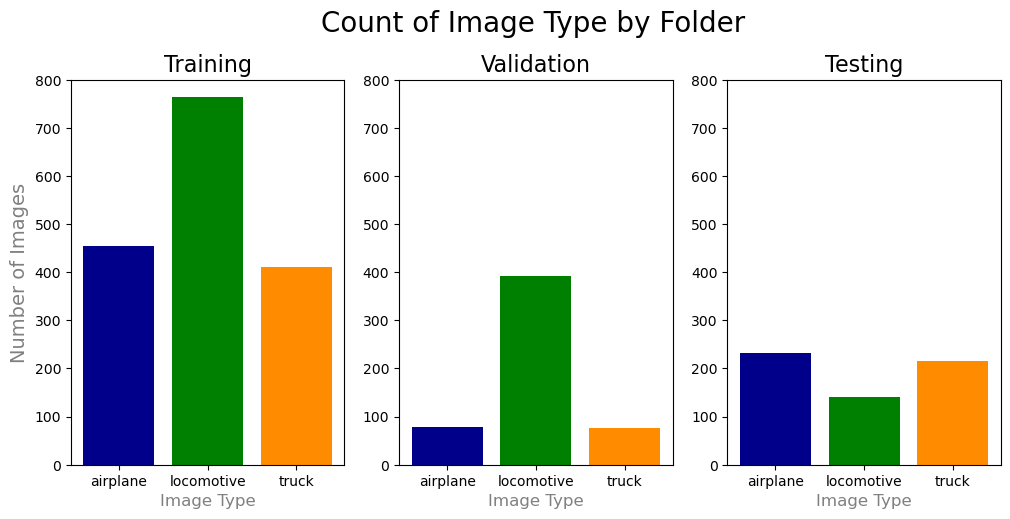

In [730]:
# Plot count of images
fig, ax = plt.subplots(1,3, figsize = (12,5))
color = ['darkblue', 'green', 'darkorange']
plt.suptitle("Count of Image Type by Folder", size = 20, x = 0.51, y = 1.02)
ax[0].bar(train_count.keys(), height = train_count.values(), color = color)
ax[0].set_title("Training", size = 16)
ax[1].bar(val_count.keys(), height = val_count.values(), color = color)
ax[1].set_title("Validation", size = 16)
ax[2].bar(test_count.keys(), height = test_count.values(), color = color)
ax[2].set_title("Testing", size = 16)
ax[0].set_xlabel("Image Type", size = 12, color = 'gray')
ax[0].set_ylabel("Number of Images", size = 14, color = 'gray')
ax[1].set_xlabel("Image Type", size = 12, color = 'gray')
ax[2].set_xlabel("Image Type", size = 12, color = 'gray')
ax[0].set_ylim(0,800), ax[1].set_ylim(0,800), ax[2].set_ylim(0,800)
plt.show()

**Summary: Count of Image Type by Folder**

* In the Training and Validation plots, we see the largest number of Locomotive images.
* However, in the Testing plot, we see the fewest number of Locomotive images.
* The count of Airplane and Truck images appear similar across the three plots

Let's view the percentage splits for each.

**Figure 2: Image Segmentation by Class**

Check split percentage for Training, Validation and Testing data within each class of Airplane, Locomotive and Truck.

In [731]:
plane_count = train_count['airplane'], val_count['airplane'], test_count['airplane']
locomotive_count = train_count['locomotive'], val_count['locomotive'], test_count['locomotive']
truck_count = train_count['truck'],val_count['truck'],  test_count['truck']

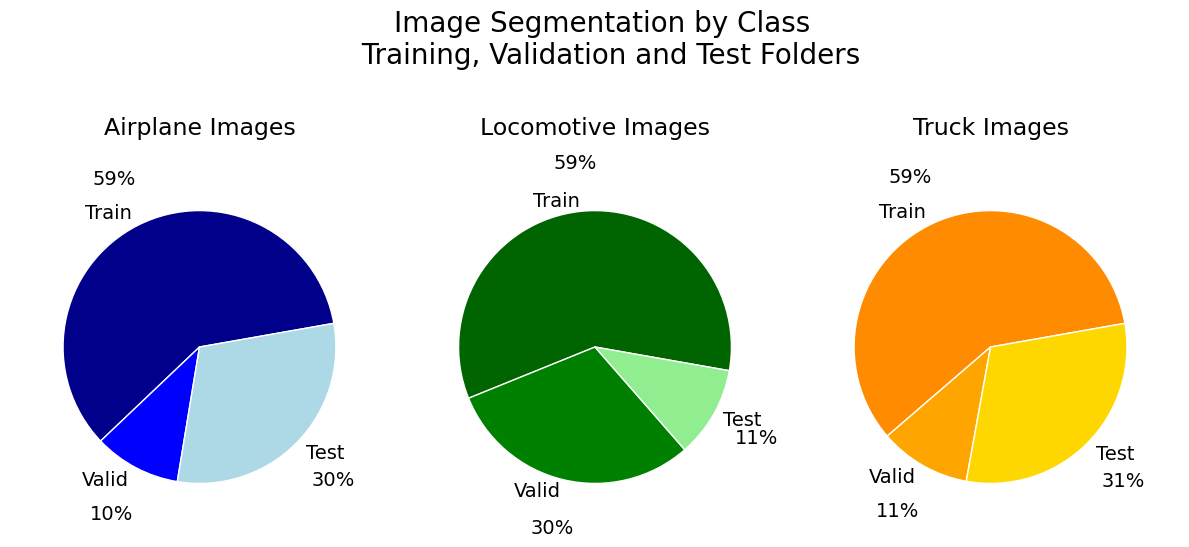

In [732]:
#View percent splits of training/validation/test data by class
fig, ax = plt.subplots(1,3, figsize = (12,6))
labels = ['Train', "Valid", "Test"]
plane_colors = ['darkblue', 'blue', 'lightblue']
locomotive_colors = ['darkgreen', 'green', 'lightgreen']
truck_colors = ['darkorange', 'orange', 'gold']
plt.suptitle("Image Segmentation by Class \n Training, Validation and Test Folders", size = 20, x = 0.51, y = 1.)
# plane
ax[0].pie(plane_count, autopct = '%1.0f%%', colors = plane_colors, radius = 0.9, startangle = 10, 
        labels = labels, pctdistance = 1.38, labeldistance = 1.1, textprops={'fontsize': 14}, wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax[0].set_title("Airplane Images", size = 17, pad = 17)
#locomotive
ax[1].pie(locomotive_count, autopct = '%1.0f%%', colors = locomotive_colors, radius = 0.9, startangle = -10,
        labels = labels, pctdistance = 1.36, labeldistance = 1.08, textprops={'fontsize': 14}, wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax[1].set_title("Locomotive Images", size = 17, pad = 17)
#truck
ax[2].pie(truck_count, autopct = '%1.0f%%', colors = truck_colors, radius = 0.9, startangle = 10,
        labels = labels, pctdistance = 1.38, labeldistance = 1.1, textprops={'fontsize': 14}, wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax[2].set_title("Truck Images", size = 17, pad = 17)
plt.tight_layout()
plt.show()

**Summary: Image Segmentation by Class** 

* Airplane and Truck images are split 59% Train, 10-11% Validation and 30-31% Test.
* However, the Locomotive images are split the same 59% Training with 30% Validation and 11% Test.
* Thus, the number of images in the Validation and Test folders are essentially reversed for Locomotives compared to the Airplane and Truck classes.

### Takeaways of Image Counts

* The data is imbalanced containing the greatest number of Locomotive images
* Locomotive images are split differently across Validation and Test sets -- compared to Airplane or Truck images.
* At a minimum, we need consistent percentage allocations across the Train, Validation, and Test data.

## View Images

Next, let's view a sampling of the images for each class:  Airplane, Locomotive and Truck.  We pull a sample of each from the Train, Validation and Test datasets to better understand our images.

### Airplane Images

To start, a sample of the Airplane images pulled from each of the train, validation and test datasets.

**Figure 3: Airplane Image Examples**

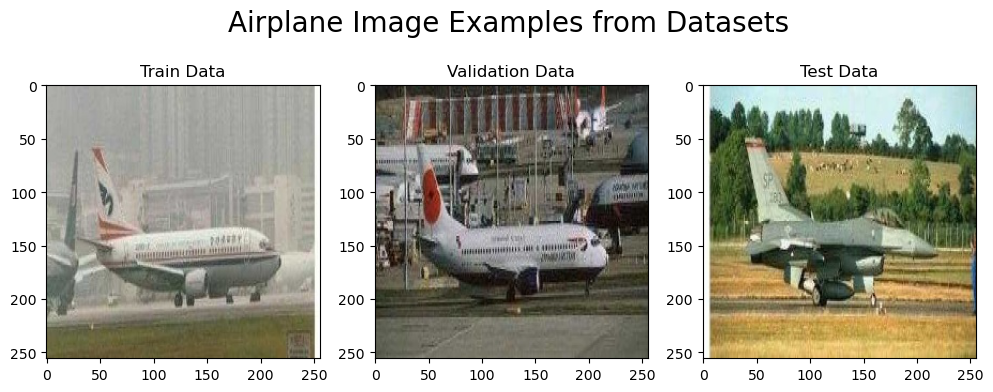

In [45]:
# Airplane Image examples from train, val, test
fig, ax = plt.subplots(1,3, figsize = (12,5))
plane_0 = Image.open('airplane_images/data/train/airplanes/8GE3O8WE0S1X.jpg')
plane_1 = Image.open('airplane_images/data/val/airplanes/N9S4O7EEHG2G.jpg')
plane_2 = Image.open('airplane_images/data/test/airplanes/7LT5TTMQOQIN.jpg')
ax[0].imshow(plane_0), ax[1].imshow(plane_1), ax[2].imshow(plane_2)
ax[0].set_title("Train Data"), ax[1].set_title("Validation Data"), ax[2].set_title("Test Data")
plt.suptitle("Airplane Image Examples from Datasets", size = 20, x = 0.51, y = 0.92)
plt.show()

**Summary:**

* **Different Types:** We see different types of airplanes from commercial to military aircraft. From prior investigation, there are also small personal airplanes in the data.
* **Background:** The images may contain buildings, trees or other structures.

* **Color/Size:** The images are in color and appear to be 256 x 256.

Below, let's print out the mode, size and format of the images to verify.

In [46]:
# Check Mode and size of images
print("Mode of plane images:", plane_0.mode, "," ,plane_1.mode, "," ,plane_2.mode)
print("Size of plane images:", plane_0.size, "," ,plane_1.size, "," ,plane_2.size)
print("Format of plane images:", plane_0.format, "," ,plane_1.format, "," ,plane_2.format)

Mode of plane images: RGB , RGB , RGB
Size of plane images: (256, 256) , (256, 256) , (256, 256)
Format of plane images: JPEG , JPEG , JPEG


The printout confirms the images are RGB and 256 x 256.  Next, let's view a sample of the locomotive images.

### Locomotive Images

Here we display a sample of Locomotive images from the train, validation and test data as noted below.  We also confirm the mode, size and format of these images.

**Figure 4: Locomotive Image Examples**

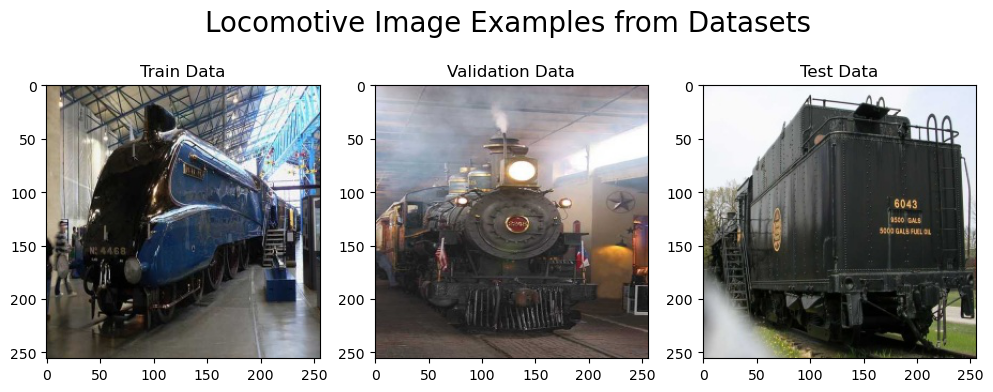

In [733]:
# Locomotive Image examples from train, val, test
fig, ax = plt.subplots(1,3, figsize = (12,5))
locomotive_0 = Image.open('locomotive_images/data/train/steam_locomotive/7SGU5TRKOTUI.jpg')
locomotive_1 = Image.open('locomotive_images/data/val/steam_locomotive/0WODHME551M6.jpg')
locomotive_2 = Image.open('locomotive_images/data/test/steam_locomotive/DWAFB8G7JYT8.jpg')
ax[0].imshow(locomotive_0), ax[1].imshow(locomotive_1), ax[2].imshow(locomotive_2)
ax[0].set_title("Train Data"), ax[1].set_title("Validation Data"), ax[2].set_title("Test Data")
plt.suptitle("Locomotive Image Examples from Datasets", size = 20, x = 0.51, y = 0.92)
plt.show()

**Summary:**

* **Different Types/Components:** We see different types of locomotives with different combinations of wheels, axles and the front pilot (or cowcatcher) that our models will need to detect.
* **Darkness/Brightness:** These images appear to have a lot of dark space, which could make them difficult to read. Therefore, we need to consider our brightness options.

We can confirm the mode and size of these images.

In [49]:
# Check Mode and size of images
print("Mode of locomotive images:", locomotive_0.mode,",",locomotive_1.mode,",",locomotive_2.mode)
print("Size of locomotive images:", locomotive_0.size,",",locomotive_1.size,",", locomotive_2.size)
print("Format of locomotive images:", locomotive_0.format,",",locomotive_1.format,",", locomotive_2.format)

Mode of locomotive images: RGB , RGB , RGB
Size of locomotive images: (256, 256) , (256, 256) , (256, 256)
Format of locomotive images: JPEG , JPEG , JPEG


The printout confirms these locomotive images are also RGB and 256 x 256.  Next, let's view a sampling of the truck images.

### Truck Images

Next, let's view a sample of the Truck images also pulling from the training, validation and test datasets.

**Figure 5: Truck Image Examples**

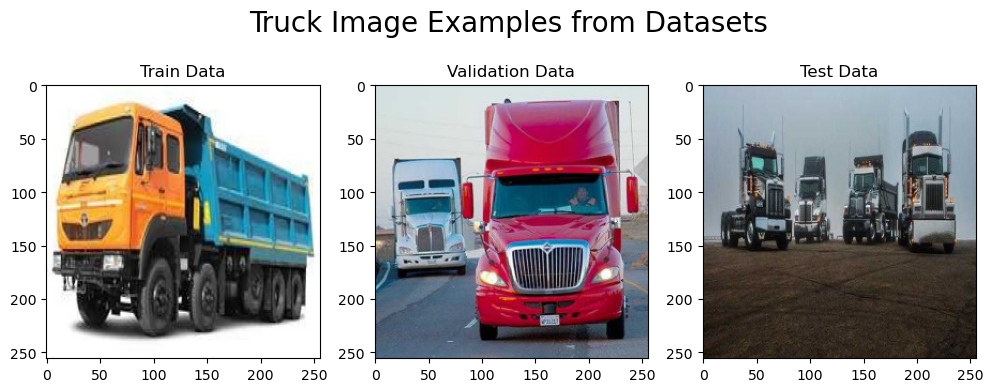

In [50]:
# Truck Image examples from train, val, test
fig, ax = plt.subplots(1,3, figsize = (12,5))
truck_0 = Image.open('truck_images/data/train/truck/RP0J5LR6628B.jpg')
truck_1 = Image.open('truck_images/data/val/truck/P56K7FI0CA79.jpg')
truck_2 = Image.open('truck_images/data/test/truck/6108YPACS1ZJ.jpg')
ax[0].imshow(truck_0), ax[1].imshow(truck_1), ax[2].imshow(truck_2)
ax[0].set_title("Train Data"), ax[1].set_title("Validation Data"), ax[2].set_title("Test Data")
plt.suptitle("Truck Image Examples from Datasets", size = 20, x = 0.51, y = 0.92)
plt.show()

**Summary:**

* **Multiple Vehicles:** Here we see the images may have multiple vehicles.  Therefore, we want to consider capturing the image data to the edges since the image may not contain a single vehicle at the center of the image.
* **Front or Side View:** We also see the images may be of the front or side view.  Therefore, we may want to rotate or flip the images.

In [51]:
# Check Mode and size of images
print("Mode of truck images:", truck_0.mode,",",truck_1.mode,",",truck_2.mode)
print("Size of truck images:", truck_0.size,",",truck_1.size,",", truck_2.size)
print("Format of truck images:", truck_0.format, ",", truck_1.format, ",", truck_2.format)

Mode of truck images: RGB , RGB , RGB
Size of truck images: (256, 256) , (256, 256) , (256, 256)
Format of truck images: JPEG , JPEG , JPEG


### Takeaways from Image Views

* The images may contain more than one vehicle
* The images may have background noise
* The images are all in RGB format with the same size (256,256) and same file format (.jpeg)
* All images have wheels to the ground/bottom of the image; therefore, we would **not** do a vertical flip of the images.

## Correlation between Images

Next, let's view the correlation between images.  Here we create a helper function and calculate the correlation between samples of 50 images from each class.  For ease, these values are visualized in the Image Correlation Matrix below.

In [58]:
# Helper function to calculate correlation of images in different folders
def calc_corr(img1_path, img2_path):
    img1 = np.array(Image.open(img1_path).convert('L')).flatten()
    img2 = np.array(Image.open(img2_path).convert('L')).flatten()
    return np.corrcoef(img1, img2)[0,1]  

In [59]:
#get files for function below
plane_image_files = os.listdir('proj_dir/train_dir/airplane')
locomotive_image_files = os.listdir('proj_dir/train_dir/locomotive')
truck_image_files = os.listdir('proj_dir/train_dir/truck')

In [60]:
# Correlation between airplane and locomotive
corr_lst = []
for i in range(50):
    for j in range(50):
        img1_path = os.path.join('proj_dir/train_dir/airplane', plane_image_files[i])
        img2_path = os.path.join('proj_dir/train_dir/locomotive', locomotive_image_files[j])
        corr = calc_corr(img1_path, img2_path)
        corr_lst.append(corr)
plane_loco_corr = round(sum(corr_lst)/len(corr_lst),4)
print(f"The average correlation between airplane and locomotive images is: {plane_loco_corr}")

The average correlation between airplane and locomotive images is: 0.0891


In [61]:
# Correlation between airplane and truck
corr_lst = []
for i in range(50):
    for j in range(50):
        img1_path = os.path.join('proj_dir/train_dir/airplane', plane_image_files[i])
        img2_path = os.path.join('proj_dir/train_dir/truck', truck_image_files[j])
        corr = calc_corr(img1_path, img2_path)
        corr_lst.append(corr)
plane_truck_corr = round(sum(corr_lst)/len(corr_lst),4)
print(f"The average correlation between airplane and truck images is: {plane_truck_corr}")

The average correlation between airplane and truck images is: 0.0566


In [62]:
corr_lst = []
for i in range(50):
    for j in range(50):
        img1_path = os.path.join('proj_dir/train_dir/locomotive', locomotive_image_files[i])
        img2_path = os.path.join('proj_dir/train_dir/truck', truck_image_files[j])
        corr = calc_corr(img1_path, img2_path)
        corr_lst.append(corr)
loco_truck_corr = round(sum(corr_lst)/len(corr_lst),4)
print(f"The average correlation between locomotive and truck images is: {loco_truck_corr}")

The average correlation between locomotive and truck images is: 0.2029


In [63]:
# Create array with the correlation values
veh_corr_arr = [[1.0, plane_loco_corr, plane_truck_corr],
                [plane_loco_corr, 1.0, loco_truck_corr],
                [plane_truck_corr, loco_truck_corr, 1.0]]

**Figure 6: Image Correlation Matrix**

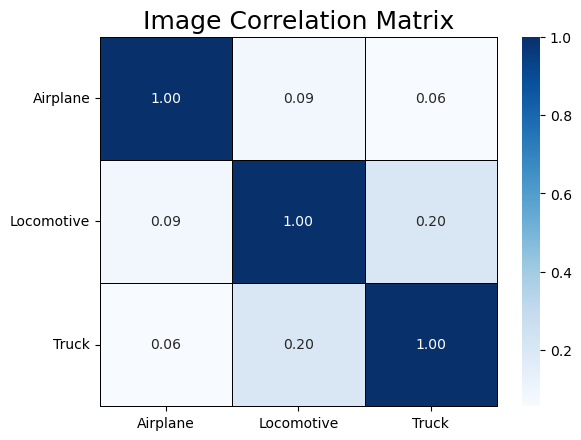

In [64]:
# Create Image Correlation Matrix
classes = ['Airplane', 'Locomotive', 'Truck']
ax_corr = sns.heatmap(veh_corr_arr, cmap = 'Blues', annot = True, fmt = '.2f', linewidth = 0.5, linecolor = 'black', clip_on = False)
ax_corr.set_title("Image Correlation Matrix", fontsize = 18)
ax_corr.set_xticklabels('')
ax_corr.set_xticks([0.5, 1.5, 2.5], classes)
ax_corr.set_yticks([0.5, 1.5, 2.5], classes, rotation = 0)
plt.show()

### Takeaways from Image Correlation

* The expectation is this higher correlation between the Locomotive and Truck images will make it more difficult for the models to distinguish between the two classes.
* Hence, the expectation is models will perform better predicting the Airplane class

## Check Pixel Intensity

Next, let's check the pixel intensity for these images to see if there are noticeable difference between the images and classes.  This step may help identify methods for our data preparation, such as: thresholding or color correction.

In [734]:
# Save a copy of images
pln0_img, pln1_img, pln2_img = plane_0, plane_1, plane_2
loc0_img, loc1_img, loc2_img = locomotive_0, locomotive_1, locomotive_2
trk0_img, trk1_img, trk2_img = truck_0, truck_1, truck_2

### Airplane RGB Histograms

Here we view the RGB (Red Green Blue) Histograms for the airplane images, with the plane image displayed adjacent, to see how the plot reflects the image.  We also look for commonalities or differences in the histograms across this sample of airplane images.

**Figure 7: Airplane RGB Histograms**

In [66]:
# Create array for plots
pln0_arr = np.array(plane_0)
pln1_arr = np.array(plane_1)
pln2_arr = np.array(plane_2)

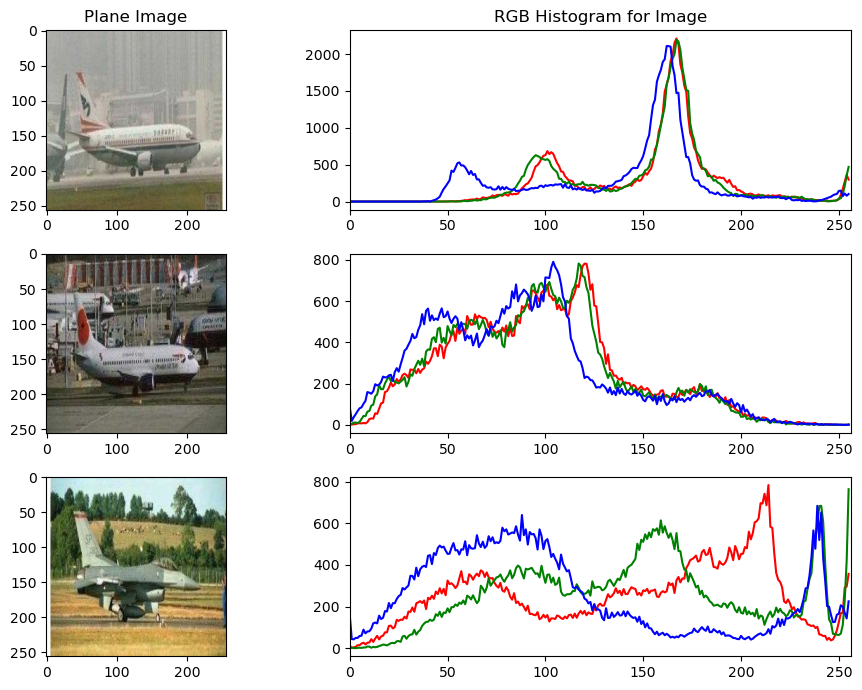

In [67]:
# View plane images and associated RGB
fig, axs = plt.subplots(3,2, figsize = (10,7))
colors0 = ("red", "green", "blue")
colors1 = ("red", "green", "blue")
colors2 = ("red", "green", "blue")
axs[0,1].set_xlim([0,256]), axs[1,1].set_xlim([0,256]), axs[2,1].set_xlim([0,256])

for chnl_id0, color0 in enumerate(colors0):
    hist0, bins0 = np.histogram(pln0_arr[:, :, chnl_id0], bins = 256, range = (0,256))
    axs[0,1].plot(bins0[0:-1], hist0, color = color0)

for chnl_id1, color1 in enumerate(colors1):
    hist1, bins1 = np.histogram(pln1_arr[:, :, chnl_id1], bins = 256, range = (0,256))
    axs[1,1].plot(bins1[0:-1], hist1, color = color1)

for chnl_id2, color2 in enumerate(colors2):
    hist2, bins2 = np.histogram(pln2_arr[:, :, chnl_id2], bins = 256, range = (0,256))
    axs[2,1].plot(bins2[0:-1], hist2, color = color2)

axs[0,0].imshow(pln0_img), axs[1,0].imshow(pln1_img), axs[2,0].imshow(pln2_img) 
axs[0,0].set_title("Plane Image"), axs[0,1].set_title("RGB Histogram for Image")
plt.tight_layout()
plt.show()

**Summary of Airplane Images and RGB Histograms:**

* We see a lot of lighter colors in these plane images; however, we can see the top image appears to have somewhat blurry or washed out buildings in the background.  This could be due to the quality of the photo, pollution or other noise.
* The middle image has other portions of planes and items in the background of the image.
* Meanwhile, the bottom image has the brightest image with most contrast -- as apparent in the histogram where we have the most separation between our red, green and blue plots.

### Locomotive RGB Histograms

Here we view the RGB (Red Green Blue) Histograms for the locomotive images, with the locomotive image displayed adjacent, to see how the plot reflects the image.  We also look for commonalities or differences in the histograms across this sample of locomotive images.

**Figure 8: Locomotive RGB Histograms**

In [735]:
# Create array for plots
loc0_arr = np.array(locomotive_0)
loc1_arr = np.array(locomotive_1)
loc2_arr = np.array(locomotive_2)

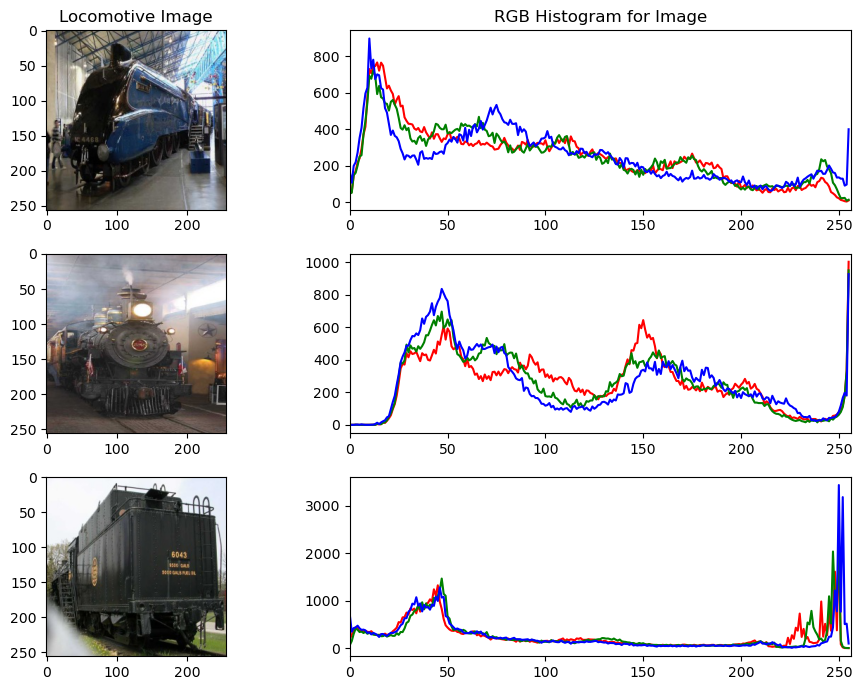

In [736]:
# View locomotive images and associated RGB
fig, axs = plt.subplots(3,2, figsize = (10,7))
colors0 = ("red", "green", "blue")
colors1 = ("red", "green", "blue")
colors2 = ("red", "green", "blue")
axs[0,1].set_xlim([0,256]), axs[1,1].set_xlim([0,256]), axs[2,1].set_xlim([0,256])

for chnl_id0, color0 in enumerate(colors0):
    hist0, bins0 = np.histogram(loc0_arr[:, :, chnl_id0], bins = 256, range = (0,256))
    axs[0,1].plot(bins0[0:-1], hist0, color = color0)

for chnl_id1, color1 in enumerate(colors1):
    hist1, bins1 = np.histogram(loc1_arr[:, :, chnl_id1], bins = 256, range = (0,256))
    axs[1,1].plot(bins1[0:-1], hist1, color = color1)

for chnl_id2, color2 in enumerate(colors2):
    hist2, bins2 = np.histogram(loc2_arr[:, :, chnl_id2], bins = 256, range = (0,256))
    axs[2,1].plot(bins2[0:-1], hist2, color = color2)

axs[0,0].imshow(loc0_img), axs[1,0].imshow(loc1_img), axs[2,0].imshow(loc2_img) 
axs[0,0].set_title("Locomotive Image"), axs[0,1].set_title("RGB Histogram for Image")
plt.tight_layout()
plt.show()

**Summary of Locomotive Images and RGB Histograms:**

* We see a lot of dark colors in the images; however, if we look closely, we see the top locomotive is blue, the second is gray and the bottom locomotive is black.
* Meanwhile, the bottom image also has a lighter background so we see a spike in the graph on the right.

### Truck RGB Histograms

Here we view the RGB (Red Green Blue) Histograms for the truck images, with the truck image displayed adjacent, to see how the plot reflects the image.  We also look for commonalities or differences in the histograms across this sample of truck images.

**Figure 9: Truck RGB Histograms**

In [70]:
# Create array for plots
trk0_arr = np.array(truck_0)
trk1_arr = np.array(truck_1)
trk2_arr = np.array(truck_2)

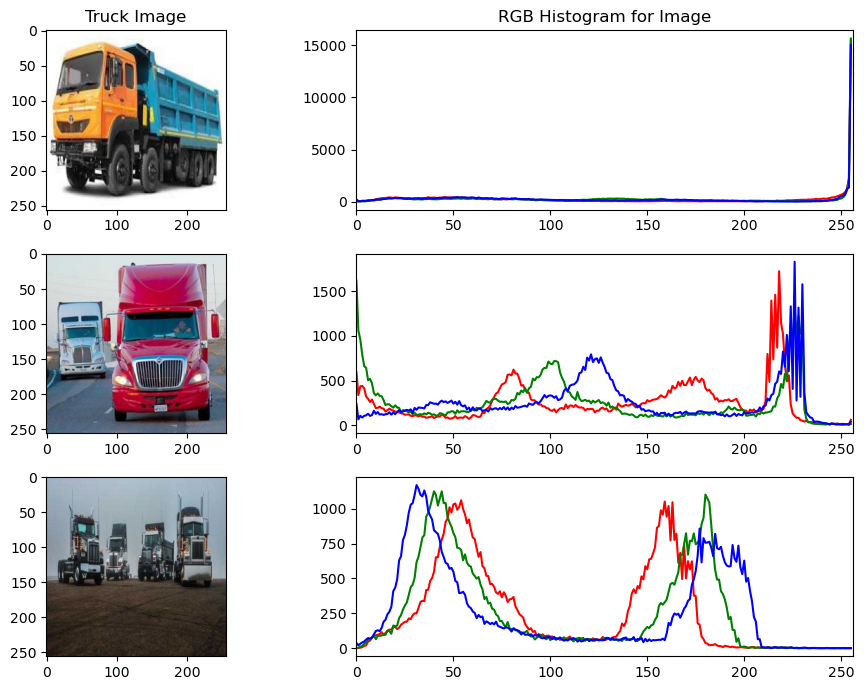

In [71]:
# View truck images and associated RGB
fig, axs = plt.subplots(3,2, figsize = (10,7))
colors0 = ("red", "green", "blue")
colors1 = ("red", "green", "blue")
colors2 = ("red", "green", "blue")
axs[0,1].set_xlim([0,256]), axs[1,1].set_xlim([0,256]), axs[2,1].set_xlim([0,256])

for chnl_id0, color0 in enumerate(colors0):
    hist0, bins0 = np.histogram(trk0_arr[:, :, chnl_id0], bins = 256, range = (0,256))
    axs[0,1].plot(bins0[0:-1], hist0, color = color0)

for chnl_id1, color1 in enumerate(colors1):
    hist1, bins1 = np.histogram(trk1_arr[:, :, chnl_id1], bins = 256, range = (0,256))
    axs[1,1].plot(bins1[0:-1], hist1, color = color1)

for chnl_id2, color2 in enumerate(colors2):
    hist2, bins2 = np.histogram(trk2_arr[:, :, chnl_id2], bins = 256, range = (0,256))
    axs[2,1].plot(bins2[0:-1], hist2, color = color2)

axs[0,0].imshow(trk0_img), axs[1,0].imshow(trk1_img), axs[2,0].imshow(trk2_img) 
axs[0,0].set_title("Truck Image"), axs[0,1].set_title("RGB Histogram for Image")
plt.tight_layout()
plt.show()

**Summary of Truck Images and RGB Histograms:**

* The top histogram shows a spike in the plot to the right, due to the white background.
* We see single or multiple vehicles in the images, as well as side or front views.
* The middle and bottom histograms have more than one peak in the graph, due to the multiple vehicles in the images.
* The RGB histograms are noticeably different just for this sampling of truck images.

### Takeaways from All RGB Histograms

* **Classes:** We see fairly different histograms within and between the classes.
* **Cropping / Zooming:** Some images have small vehicles while others have large vehicles; therefore, we need to consider the impact of cropping and zooming across different sizes.
* **Equalization:** One option for images is histogram equalization which may improve the contrast in certain images; however, this equalization tends to have better success if the background and foreground were both dark for example.
* **Orientation:** These images all have vehicles with the wheels towards the ground; therefore, if we flip images it needs to be horizontal flipping and not vertical flipping.
* **Contrast:** The images within and between classes have different contrast levels.

Let's explore data augmentation options below to see which ones work best for our images.

## Data Augmentation of Images

Since we have a small dataset, we can try data augmentation on the images.  Here we explored several options to see what works best for our images:

* Random Flip and Rotation
* Random Contrast
* Random Brightness
* Random Crop
* Random Zoom

To start, let's view the original image and then verify the impact of various data augmentation methods above.

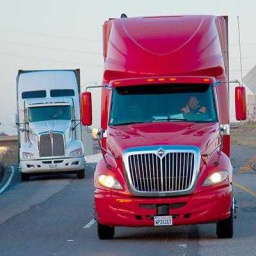

In [168]:
# Original image
truck_1

In [188]:
# first normalize the image
normalization_layer = tf.keras.layers.Rescaling(1./255)
image = normalization_layer(truck_1)

### Random Flip and Rotation

In [189]:
# Random flip and rotation
rand_flip = tf.keras.Sequential([layers.RandomFlip("horizontal_and_vertical"),layers.RandomRotation(0.2)])

In [190]:
# Expand dimensions for visual
image = tf.cast(tf.expand_dims(image, 0), tf.float32)

**Figure 10: Random Flip and Rotation**

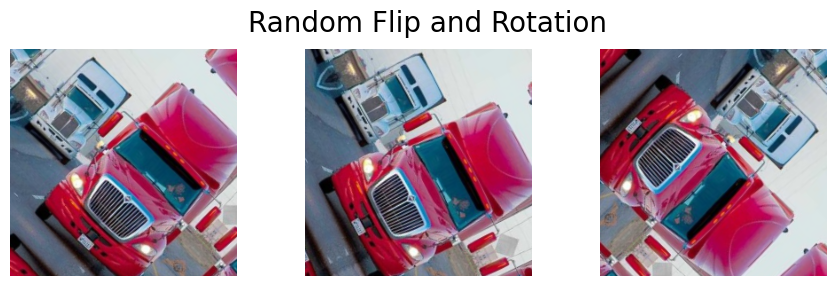

In [191]:
plt.figure(figsize=(9, 3))
for i in range(3):
  augmented_image = rand_flip(image)
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")
plt.suptitle("Random Flip and Rotation", size = 20, x = 0.51, y = 0.94)
plt.tight_layout()
plt.show()

**Takeaways:**
While the rotation may work for our images, we certainly do not want our vehicles upside down.  Therefore, any flipping of images needs to be limited to horizontal.

### Random Contrast

In [209]:
tf.experimental.numpy.experimental_enable_numpy_behavior()

In [210]:
rand_contrast = tf.keras.Sequential([layers.RandomContrast([0.2, 0.8], seed = 42)])

**Figure 11: Random Contrast**

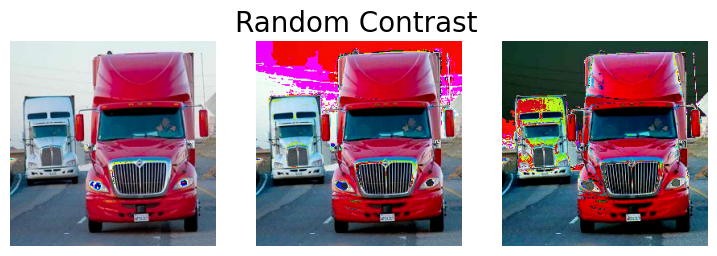

In [211]:
plt.figure(figsize=(9, 3))
for i in range(3):
  contrast_img = rand_contrast(image)
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow((contrast_img[0] * 255).astype(np.uint8))
  plt.axis("off")
plt.suptitle("Random Contrast", size = 20, x = 0.51, y = 0.94)
plt.show()

**Takeaway:** While we can see some difference across these images, it is not clear whether this improves our models.

### Random Brightness

In [233]:
rand_bright = tf.keras.Sequential([layers.RandomBrightness([-0.2, 1.2], value_range = (0.0, 1.0))])

**Figure 12: Random Brightness**

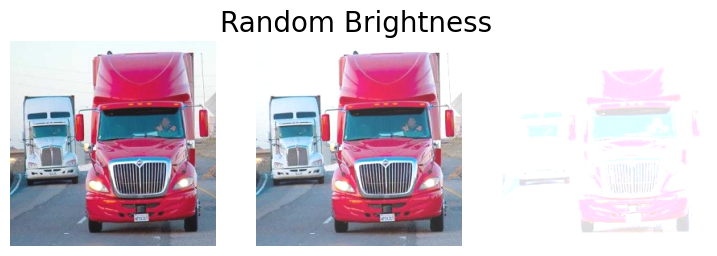

In [234]:
plt.figure(figsize=(9, 3))
for i in range(3):
  bright_img = rand_bright(image)
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(bright_img[0])
  plt.axis("off")
plt.suptitle("Random Brightness", size = 20, x = 0.51, y = 0.94)
plt.show()

**Takeaway:** The brightness values can completely wash out a brighter image or darken an already dark image.  Therefore, with this dataset which contained images of very different brightness levels, it could worsen the performance of our models.

### Random Crop

In [196]:
rand_crop = tf.keras.Sequential([layers.RandomCrop(height = 224, width = 224)])

**Figure 13: Random Crop**

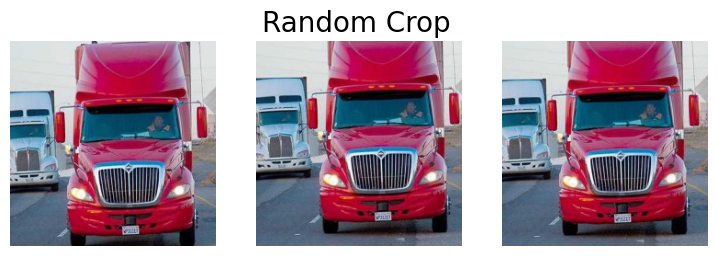

In [199]:
plt.figure(figsize=(9, 3))
for i in range(3):
  crop_img = rand_crop(image)
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(crop_img[0])
  plt.axis("off")
plt.suptitle("Random Crop", size = 20, x = 0.51, y = 0.94)
plt.show()

**Takeaway:** In an image with multiple vehicles, this may bring one of the images closer while cropping the other vehicle(s).

### Random Zoom

In [200]:
rand_zoom = tf.keras.Sequential([layers.RandomZoom(height_factor = [-0.3, 0.9],
                     width_factor = [-0.3, 0.9], fill_mode = 'constant')])

**Figure 14: Random Zoom**

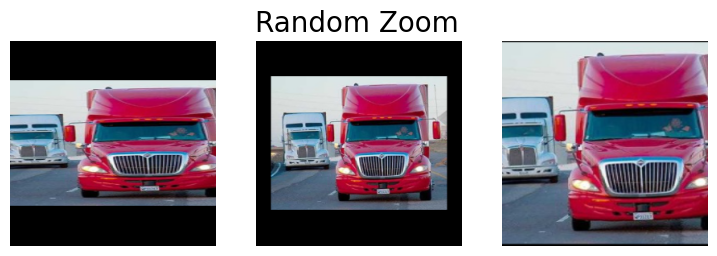

In [202]:
plt.figure(figsize=(9, 3))
for i in range(3):
  zoom_img = rand_zoom(image)
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(zoom_img[0])
  plt.axis("off")
plt.suptitle("Random Zoom", size = 20, x = 0.51, y = 0.94)
plt.show()

**Takeaway:** For certain images, this may help zoom in on a particular vehicle.  Although, for other images where the vehicle is further in the distance or towards an edge, it may zoom in on other objects such as trees.

### Takeaways from Data Augmentation

* Horizontal flip only, no vertical flip
* Rotation needs to be a smaller value, to avoid inverting the vehicle image
* Random Contrast is not a clear benefit
* Random Brightness values need to avoid causing completely white or black images
* Random Crop and Random Zoom need to avoid cutting the vehicles out of the images

Next, we explored thresholding on the first plane image to see if this improved the visual.

## Thresholding

Thresholding can be utilized to separate the objects of an image from their background; therefore, we investigated Thresholding on a plane image from above.  To start, we converted the plane image to grayscale, since Thresholding requires grayscale images.

A preliminary investigation into thresholding the top plane image utilizing Mean Adaptive Threshold and Gaussian Adaptive Threshold show the challenges with the background noise in the images.

**Figure 15: Adaptive Thresholds**

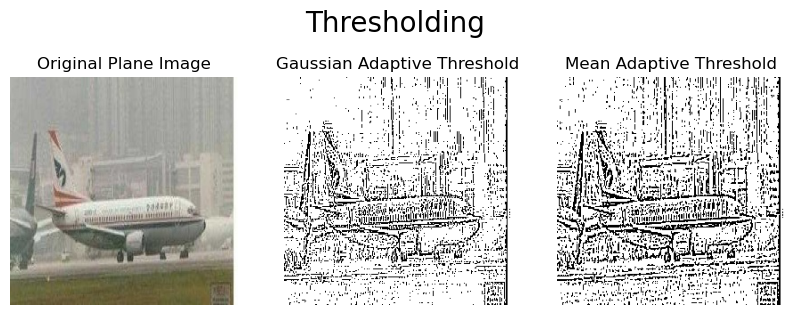

In [237]:
# Example with adaptive threshold
fig, ax = plt.subplots(1,3, figsize = (10,3))
pln_img_type = pln0_arr#image.img_to_array(plane_0, dtype = 'uint8')
pln_img_bg = cv2.cvtColor(pln_img_type, cv2.COLOR_RGB2GRAY)
thresh_g = cv2.adaptiveThreshold(pln_img_bg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 4)
thresh_m = cv2.adaptiveThreshold(pln_img_bg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 4)
ax[0].imshow(plane_0), ax[1].imshow(thresh_g, cmap = 'gray'), ax[2].imshow(thresh_m, cmap = 'gray')
ax[0].set_title("Original Plane Image"), ax[1].set_title("Gaussian Adaptive Threshold"), ax[2].set_title("Mean Adaptive Threshold")
ax[0].axis('off'), ax[1].axis('off'), ax[2].axis('off')
plt.suptitle("Thresholding", size = 20, x = 0.51, y = 1.1)
plt.show()

**Summary:** There appears to be some challenges using either method; therefore, it is inconclusive whether Thresholding would improve our results.

Let's wrap up a summary of our Exploratory Data Analysis below.

## Summary of Exploratory Data Analysis (EDA)

We see fairly different histograms within and between classes.  Thus, one concern with applying a method broadly to all images is reducing or worsening our ability to classify the images.  

* **Data Transformations:** Since we have images, these images need to be converted into arrays of numbers for our analysis.  In particular, we have RGB images with values in the range of (0,255) which need to be normalized or rescaled for our analysis.

* **Imbalanced Data:** While we have similar numbers of Airplane and Truck images across the Train, Validation and Test data, we have more Locomotive images in the Train and Validation sets -- yet fewer Locomotive images in our Test data.  However, keeping the additional Locomotive images in our datasets while ensuring the stratification across Train, Validation and Test data may improve the performance of our models -- given what we learned from the Image Correlation Matrix.

* **Correlation Matrix:** There is higher correlation between the Locomotive and Truck images than with Airplane-Locomotive or Airplane-Truck.  Therefore, the expectation is a greater difficulty in our models distinguishing between the Locomotive and Truck classes.  

* **Data Augmentation:** Since we have a relatively small dataset, we can augment the images data with methods such as: horizontal flipping, rotation, shift and zoom of the image.  These methods may improve our models since we also have side views of the vehicles.

An option which was considered, but not supported by the EDA:

* **Equalization:** Histogram equalization may improve the contrast in certain images; however, this equalization tends to have better success if the background and foreground were both dark for example.

# Data Preparation

Prior to creating our models, we need to do some final cleaning and balancing of the data.

## Data Cleaning

### Remove illegible files

While the check on image size and loading did not reveal missing or corrupt images, visual inspection detected some issues.  No issues were identified with the Airplane images; therefore, we start with the Locomotive images below.

**Locomotive Image Cleaning:**

Four Locomotive images were identified as having issues, since one was extremely dark while three others did not contain a locomotive.  Given Locomotives contained more images than Airplanes or Trucks, we remove these images below.

In [52]:
# Remove the locomotive images identified as having issues
#os.remove('locomotive_images/data/test/steam_locomotive/ASATTVL1CMRZ.jpg')
#os.remove('locomotive_images/data/test/steam_locomotive/AXELYY58W629.jpg')
#os.remove('locomotive_images/data/test/steam_locomotive/6UVDMGN7M20S.jpg') 
#os.remove('locomotive_images/data/val/steam_locomotive/OBHTNMMREK6C.jpg')
print("Files removed")

Files removed


**Truck Image Cleaning:**

We also identified several Truck images that were cleaned because the file did not contain an image of a truck -- instead one contained a trailer, another was of a person and a third was a portion of a logo.

In [53]:
# Remove the truck images identified as having issues
#os.remove('truck_images/data/train/truck/0NVTVV54ATOT.jpg')
#os.remove('truck_images/data/train/truck/X8CIHTGYUFC0.jpg')
#os.remove('truck_images/data/test/truck/RVJBQUY1EK6O.jpg') 
print("Files removed")

Files removed


### Fix issue with percentage split

In our EDA, we saw the Locomotive images were not split in the same percentage to training, validation and test data as the Airplane or Truck images.  Instead, it appeared the percentages allocated to validation and test were the reverse of the other two image sets.  Therefore, one simple solution is to swap our validation and test folders -- since the data itself does not contain a label, just the folder.

In [737]:
# check counts before swap
print("Test folder contains {len_folder} locomotive images".format(len_folder = len(locomotive_test_files)))
print("Val folder contains {len_folder} locomotive images".format(len_folder = len(locomotive_val_files)))
print("Train folder contains {len_folder} locomotive images".format(len_folder = len(locomotive_train_files)))

Test folder contains 140 locomotive images
Val folder contains 393 locomotive images
Train folder contains 764 locomotive images


In [738]:
# rename val -> temp
#src = 'locomotive_images/data/val'
#dest = 'locomotive_images/data/temp'
#os.rename(src,dest)
print("Source path renamed to destination")

Source path renamed to destination


In [739]:
#rename test -> val
#src = 'locomotive_images/data/test'
#dest = 'locomotive_images/data/val'
#os.rename(src,dest)
print("Source path renamed to destination")

Source path renamed to destination


In [740]:
# rename temp -> test
#src = 'locomotive_images/data/temp'
#dest = 'locomotive_images/data/test'
#os.rename(src,dest)
print("Source path renamed to destination")

Source path renamed to destination


In [741]:
# Check number of images per file
locomotive_test_files = os.listdir('locomotive_images/data/test/steam_locomotive')
print("Test folder contains {len_folder} locomotive images".format(len_folder = len(locomotive_test_files)))

locomotive_val_files = os.listdir('locomotive_images/data/val/steam_locomotive')
print("Val folder contains {len_folder} locomotive images".format(len_folder = len(locomotive_val_files)))

locomotive_train_files = os.listdir('locomotive_images/data/train/steam_locomotive')
print("Train folder contains {len_folder} locomotive images".format(len_folder = len(locomotive_train_files)))

Test folder contains 393 locomotive images
Val folder contains 140 locomotive images
Train folder contains 764 locomotive images


In [742]:
train_count = {'airplane': len(plane_train_files),'locomotive': len(locomotive_train_files),'truck': len(truck_train_files)}
val_count = {'airplane': len(plane_val_files),'locomotive': len(locomotive_val_files),'truck': len(truck_val_files)}
test_count = {'airplane': len(plane_test_files),'locomotive': len(locomotive_test_files),'truck': len(truck_test_files)}

In [743]:
locomotive_count = train_count['locomotive'], val_count['locomotive'], test_count['locomotive']
print("Train %:", round(train_count['locomotive']/sum(list(locomotive_count))*100,0))
print("Val %:", round(val_count['locomotive']/sum(list(locomotive_count))*100,0))
print("Test %:", round(test_count['locomotive']/sum(list(locomotive_count))*100, 0))

Train %: 59.0
Val %: 11.0
Test %: 30.0


## Create Directories

Here we create a new directory, Project Directory, with sub-directories for train and validation. Then within each sub-directory, we have the Airplane, Locomotive and Truck Images as shown:


    Project Directory
    
    __Train
        - Airplane
        - Locomotive
        - Truck
      
    __Valid
        - Airplane
        - Locomotive
        - Truck

The images are segmented into Airplane, Locomotive or Truck folders containing the train and validation data. As the data is extracted for our modeling, the class is one-hot encoded for each type of image coming from the Train and Valid folders:  Airplane, Locomotive or Truck. 

In [753]:
# Create project directory
#proj_dir = 'proj_dir'
#os.mkdir(proj_dir)

In [757]:
# Create new folders for training and validation
#train_dir = os.path.join(proj_dir, 'train_dir')
#os.mkdir(train_dir)

#valid_dir = os.path.join(proj_dir, 'valid_dir')
#os.mkdir(valid_dir)

# Create separate folders inside train for different labels
#airplane = os.path.join(train_dir, 'airplane')
#os.mkdir(airplane)

#locomotive = os.path.join(train_dir, 'locomotive')
#os.mkdir(locomotive)

#truck = os.path.join(train_dir, 'truck')
#os.mkdir(truck)

# Create separate folders inside validation for different labels
#airplane = os.path.join(valid_dir, 'airplane')
#os.mkdir(airplane)

#locomotive = os.path.join(valid_dir, 'locomotive')
#os.mkdir(locomotive)

#truck = os.path.join(valid_dir, 'truck')
#os.mkdir(truck)

In [763]:
# Check folders exist
print("Directories:", os.listdir('proj_dir'))
print("Train_dir folders:", os.listdir('proj_dir/train_dir'))
print("Valid_dir folders:", os.listdir('proj_dir/valid_dir'))

Directories: ['.DS_Store', 'train_dir', 'test_dir', 'valid_dir']
Train_dir folders: ['locomotive', 'truck', 'airplane']
Valid_dir folders: ['locomotive', '.DS_Store', 'truck', 'airplane']


## Transfer Images 

Now, we transfer the images into our training and validation directories.

**Transfer images into training directory**

In [80]:
# transfer images from each separate folder into train
#for image in plane_train_files:
    #fname = image
    #source_pth = os.path.join('airplane_images/data/train/airplanes', fname)
    #dest_pth = os.path.join('proj_dir/train_dir/airplane', fname)
    #shutil.copyfile(source_pth, dest_pth)

In [81]:
# transfer images from each separate folder into train
#for image in locomotive_train_files:
    #fname = image
    #source_pth = os.path.join('locomotive_images/data/train/steam_locomotive', fname)
    #dest_pth = os.path.join('proj_dir/train_dir/locomotive', fname)
    #shutil.copyfile(source_pth, dest_pth)

In [82]:
# transfer images from each separate folder into train
#for image in truck_train_files:
    #fname = image
    #source_pth = os.path.join('truck_images/data/train/truck', fname)
    #dest_pth = os.path.join('proj_dir/train_dir/truck', fname)
    #shutil.copyfile(source_pth, dest_pth)

In [266]:
# Check number of images in each folder
print("Train folder, airplane:", len(os.listdir('proj_dir/train_dir/airplane')))
print("Train folder, locomotive:", len(os.listdir('proj_dir/train_dir/locomotive')))
print("Train folder, truck:", len(os.listdir('proj_dir/train_dir/truck')))

Train folder, airplane: 455
Train folder, locomotive: 764
Train folder, truck: 411


**Transfer images into validation directory**

In [267]:
# transfer images from each separate folder into valid
#for image in plane_val_files:
    #fname = image
    #source_pth = os.path.join('airplane_images/data/val/airplanes', fname)
    #dest_pth = os.path.join('proj_dir/valid_dir/airplane', fname)
    #shutil.copyfile(source_pth, dest_pth)

In [268]:
# transfer images from each separate folder into valid
#for image in locomotive_val_files:
    #fname = image
    #source_pth = os.path.join('locomotive_images/data/val/steam_locomotive', fname)
    #dest_pth = os.path.join('proj_dir/valid_dir/locomotive', fname)
    #shutil.copyfile(source_pth, dest_pth)

In [269]:
# transfer images from each separate folder into valid
#for image in truck_val_files:
    #fname = image
    #source_pth = os.path.join('truck_images/data/val/truck', fname)
    #dest_pth = os.path.join('proj_dir/valid_dir/truck', fname)
    #shutil.copyfile(source_pth, dest_pth)

In [270]:
# Check number of images in each folder
print("Validation folder, airplane:", len(os.listdir('proj_dir/valid_dir/airplane')))
print("Validation folder, locomotive:", len(os.listdir('proj_dir/valid_dir/locomotive')))
print("Validation folder, truck:", len(os.listdir('proj_dir/valid_dir/truck')))

Validation folder, airplane: 79
Validation folder, locomotive: 141
Validation folder, truck: 76


Now, we are ready for our Image Generators and Normalization.

## Image Generators and Normalization

Here we used the Image Data Generator to prepare the images, since the models execute more quickly if the data augmentation is done in advance of compiling and fitting the model -- rather than building the data augmentation layers into the Sequential model.

**Normalization:** Using the rescale argument, we can multiply the pixel by 1.0/255 to normalize to a range of 0 to 1.

**Data Augmentation:** 

* **Rotation:** We use a value of 10, since we only want the images to rotate a small degree.
  
* **Shift:** We use width shift range, height shift range to randomly shift the images by 0.2 since vehicles were not centered in all images.

* **Zoom:** We set the zoom to 0.2 which is a range of [0.8, 1.2] and slightly zooms in/out on the images since vehicles were near and at a distance.

* **Hortizontal Flip:** Horizontal flip set to true will randomly flip the images left to right.

* **Vertical Flip:** Vertical flip set to false will ensure we do not flip the images vertically, since we did not see any Airplanes, Locomotives or Trucks upside down.

In [272]:
# Create paths to each
train_pth = 'proj_dir/train_dir'
valid_pth = 'proj_dir/valid_dir'

In [610]:
# Set image and batch sizes
img_sz = 256
train_batch_sz = 10
valid_batch_sz = 10

In [611]:
# Create instance of image data generator and rescale, shift, zoom, horiz flip
idg = ImageDataGenerator(rescale = 1.0/255,
                         rotation_range = 10,
                         width_shift_range = 0.2,
                         height_shift_range = 0.2,
                         zoom_range = 0.2,
                         horizontal_flip = True,
                         vertical_flip = False) # do not vert flip

In [612]:
train_gen = idg.flow_from_directory(train_pth,
                                   target_size = (img_sz,img_sz),
                                   batch_size = train_batch_sz,
                                   class_mode = 'categorical',
                                   shuffle = True) 


valid_gen = idg.flow_from_directory(valid_pth,
                                   target_size = (img_sz,img_sz),
                                   batch_size = valid_batch_sz,
                                   class_mode = 'categorical',
                                   shuffle = True) 

Found 1630 images belonging to 3 classes.
Found 295 images belonging to 3 classes.


In [613]:
test_gen = idg.flow_from_directory(valid_pth,
                                  target_size = (img_sz, img_sz),
                                  batch_size = 1,
                                  class_mode = 'categorical', 
                                  shuffle = False)

Found 295 images belonging to 3 classes.


# Model Architecture and Preparation

The Visual Geometry Group (VGG) at Oxford University published multiple research papers on Convolutional Neural Networks (CNN).  One of their CNN architectures for image recognition is referred to as VGG-16, since it contains 16 layers -- whereas another architecture is referred to as VGG-19, since it contains 19 layers.

The VGG-16 Architecture is depicted below. These layers are a combination of Convolution 2D, followed by MaxPooling, and Fully Connected (FC) Dense layers. The key components are:

**Convolution 2D:** The number 3 indicates the 3x3 filter size and 64, 128, 256, 512 are the number of filters.

**MaxPooling:** After each block of Convolution 2D, there is Max Pooling.

**Fully Connected (FC):** The Fully Connected Dense Layers occur after the last block of Convolution 2D and Max Pooling.

**Activation:** While not shown due to space, the ReLU (Rectified Linear Unit) activation function is used with the Convolution layers.  Meanwhile, the final activation is Softmax which is shown below.

**Figure 16: VGG-16 Architecture**

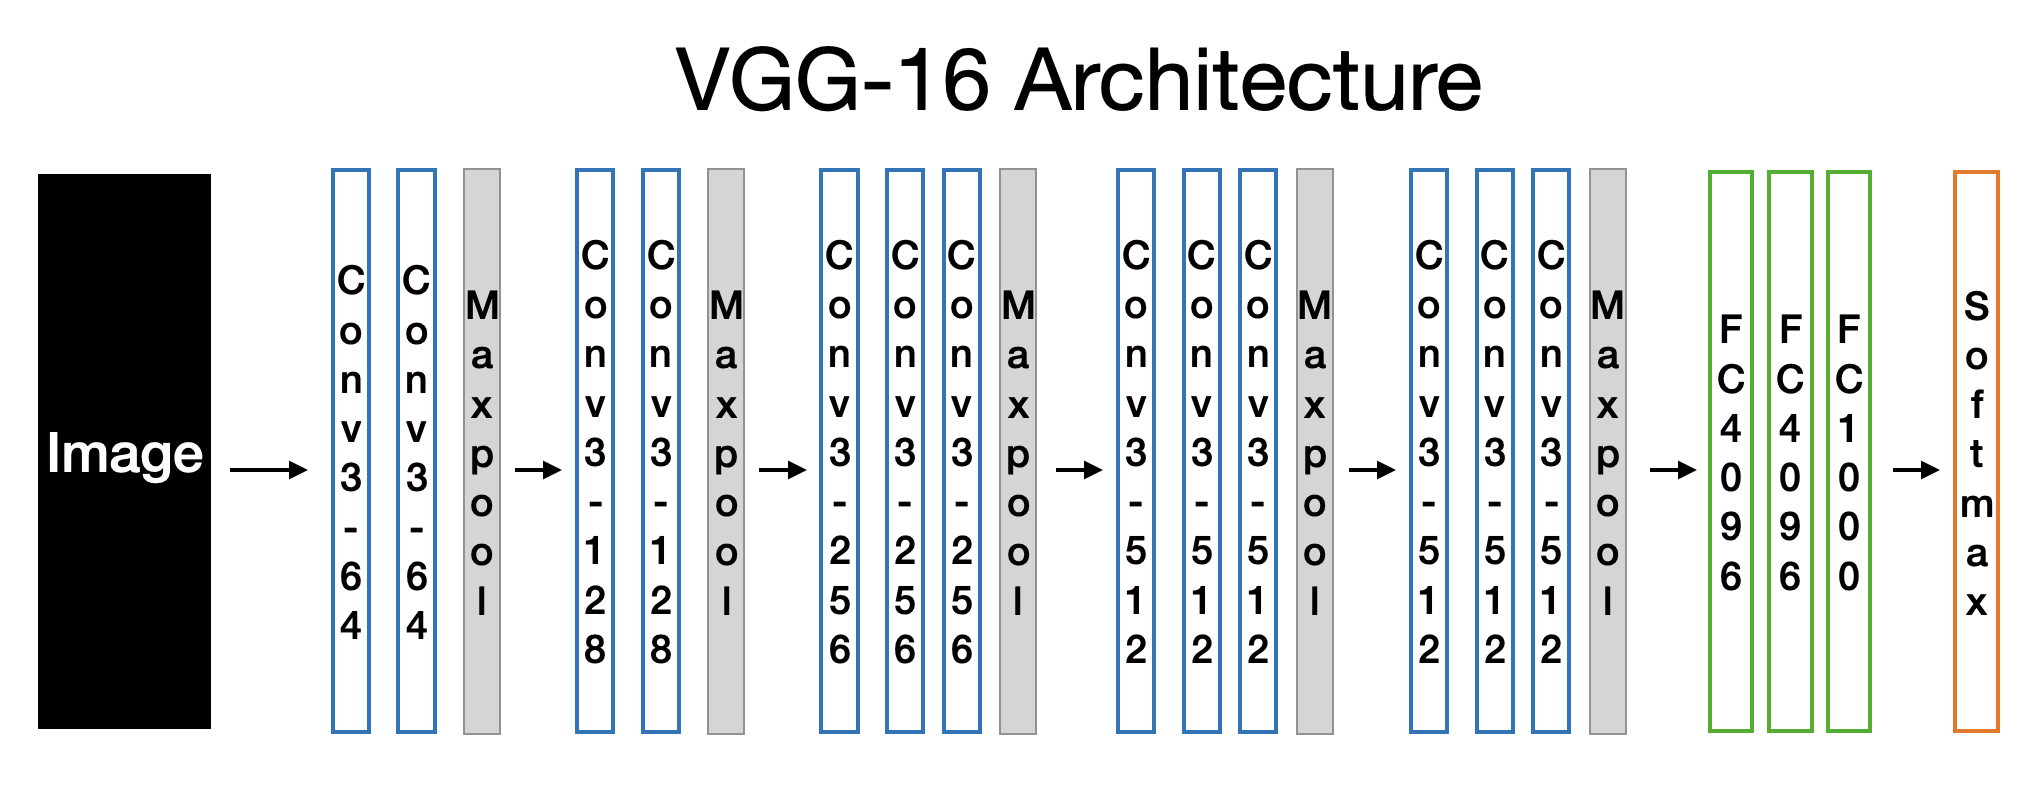

In [242]:
#VGG-16 architecture
vgg_16 = Image.open('VGG-16_model_architecture.png')
display(vgg_16)

For the initial model, we started with a modified version of the VGG-16 Architecture.  For simplicity, this was narrowed down into 3 blocks of Convolution 2D layers with MaxPooling, a single Dense layer and Softmax for the final activation.  ReLu was used for our other activation layers.  A diagram of this model is shown below.

**Figure 17: Initial CNN Model Architecture**

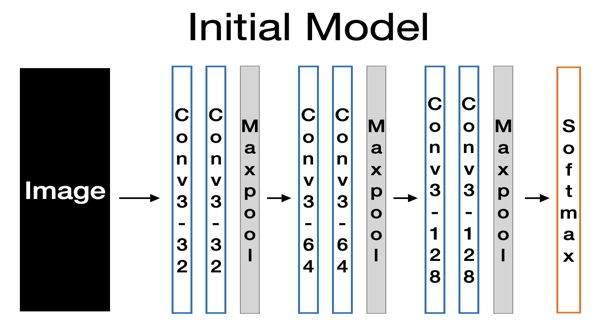

In [780]:
#Initial model
init_mod = Image.open('Initial_CNN_model_architecture.png')
resz_init = (600,320)
resz_init_mod = init_mod.resize(resz_init)
display(resz_init_mod)

**Initial Model Details:**

* **Kernel Size:** Here we start with a kernel size of 3x3 which is the size of each filter. 

* **Pool Size:** We utilize MaxPooling to downsample or downscale along the height and width dimensions.

* **Number of Filters with each layer:**  For images, the recommendation was to increase the number of filters per layer.  Therefore, we start with three layers with the number of filters proceeding from 32 to 64 to 128.

* **Convolution 2D:**  Since we have images, we use the Convolution 2D package with the above kernel size and filters.  The default kernel initializer is glorot uniform.

* **Activation:**  For each layer, we used the Rectified Linear Unit or 'relu' activation.  Then, for the final activation, we use Softmax with 3 units of output which provides a probability of three classes in this project.

* **Optimizer:**  When we compile the model, we select the Adaptive Moment estimation or 'Adam' optimizer which tends to perform well and; therefore, is a good starting point.  The default learning rate for Adam is 0.001.

While the results were good, there were some challenges with the number of epochs, learning rate, early stopping, and Validation Accuracy dropping as the model trained.  Therefore, we experimented with different hyperparameters and methods to improve our results.  

**Building Models with increasing numbers of filters:**

A key item noticed in our modeling was additional layers of increasing numbers of filters led to better performance.  Rather than having multiple Convolution 2D layers together, these models used a single Convolution layer while increasing the filters throughout.  Also, stacked Convolution Layers plus Max Pooling slowed the execution times of our models while not performing better on the validation data.  Instead, strides and Dropouts were used to try and improve our results while executing more quickly. 

After prior experimentation, this section is shortened to display the top models with explanation of the hyperparameters and learnings from our modeling efforts.  The experimentation included: 

* Activation functions

* Batch Normalization

* Layer Normalization

* Loss functions

* Optimizers

* Regularizers

* Number of layers

During this experimentation, Layer Normalization and l2 regularizer did not yield good results.  Therefore, those methods are not shown below.  Now, let's build our models.

# Build Models

## Model 1: Convolution Layers with MaxPooling and Dropout

**Kernel Size:** Here we start with a kernel size of 3x3 which is the size of each filter. 

**Pool Size:** We utilize MaxPooling 2D layer which will downsample or downscale along the height and width dimensions.

**Number of Filters with each layer:**  For images, the recommendation was to increase the number of filters per layer.  Therefore, we start with three layers with the number of filters proceeding from 32 to 64 to 128.

**Conv2D:**  Since we have images, we use the Convolution 2D package with the above kernel size and filters.  The default kernel initializer is glorot uniform.

**Dropout:**  We set a drop out of 0.25 for each layer to randomly mask 25% of the data and help prevent overfitting.

**Activation:**  For each layer, we use Rectified Linear Unit or 'relu' activation.  Then, for the final activation, we use Softmax with 3 units of output which provides a probability of three classes -- which are the Airplane, Locomotive and Truck images in this project.

**Loss:** Categorical Crossentropy is utilized, since we have three categories of images.

**Optimizer:**  When we compile the model, we select the Adaptive Moment estimation or 'Adam' optimizer which tends to perform well and; therefore, is a good starting point.  The default learning rate for Adam is 0.001.

In [282]:
# Set initial kernel size, pool size and filters
kernel_sz = (3,3)

# Number of filters with each layer
filters_1 = 32
filters_2 = 64
filters_3 = 128

In [283]:
# Initialize model
model1 = Sequential()

In [284]:
# Add layers to model
model1.add(Conv2D(filters_1, kernel_sz, activation = 'relu', padding = 'same')) 
model1.add(Conv2D(filters_1, kernel_sz, activation = 'relu', padding = 'same'))
model1.add(MaxPooling2D())
model1.add(Dropout(0.25))

model1.add(Conv2D(filters_2, kernel_sz, activation = 'relu', padding = 'same'))
model1.add(Conv2D(filters_2, kernel_sz, activation = 'relu', padding = 'same'))
model1.add(MaxPooling2D())
model1.add(Dropout(0.25))

model1.add(Conv2D(filters_3, kernel_sz, activation = 'relu', padding = 'same'))
model1.add(Conv2D(filters_3, kernel_sz, activation = 'relu', padding = 'same'))
model1.add(MaxPooling2D())
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(256))
model1.add(Dense(units = 3, activation = 'softmax'))

In [285]:
# Compile model
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [286]:
history = model1.fit(train_gen, 
                    validation_data = valid_gen,
                    epochs = 10,
                    verbose = 1) 

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 122s 743ms/step - accuracy: 0.5430 - loss: 1.4961 - val_accuracy: 0.6339 - val_loss: 0.7995
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 125s 767ms/step - accuracy: 0.6037 - loss: 0.8868 - val_accuracy: 0.6678 - val_loss: 0.7860
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 126s 773ms/step - accuracy: 0.6440 - loss: 0.7769 - val_accuracy: 0.6237 - val_loss: 0.8032
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 130s 799ms/step - accuracy: 0.6384 - loss: 0.7894 - val_accuracy: 0.6983 - val_loss: 0.6619
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.6885 - loss: 0.7246 - val_accuracy: 0.7254 - val_loss: 0.6022
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.7009 - loss: 0.6763 - val_accuracy: 0.6983 - val_loss: 0.6530
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.7274 - loss: 0.6222 - val_accuracy: 0.7424 - val_loss: 0.5651
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 154s 942ms/step - accuracy: 0.7609 - loss: 0.

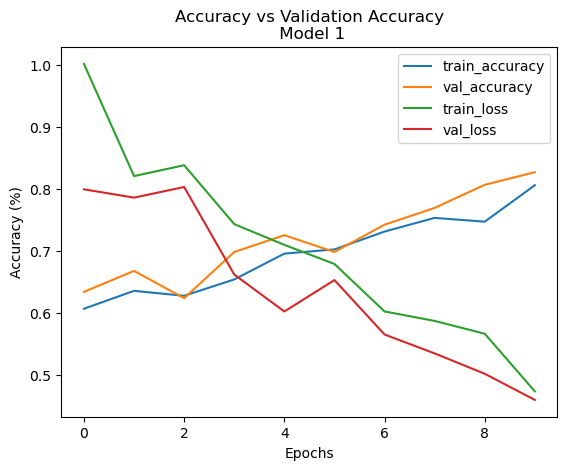

In [287]:
model1_loss = pd.DataFrame(model1.history.history)
model1_loss = model1_loss.rename(columns = {'accuracy': 'train_accuracy', 'loss': 'train_loss'})
model1_loss[['train_accuracy', 'val_accuracy', 'train_loss', 'val_loss']].plot()
plt.title("Accuracy vs Validation Accuracy\n Model 1")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.show()

In [288]:
max_val_acc1 = model1_loss.val_accuracy.max()
print("Maximum Validation Accuracy for Model:", round(max_val_acc1 * 100,2), "%")

Maximum Validation Accuracy for Model: 82.71 %


In [289]:
min_val_loss1 = model1_loss.val_loss.min()
print("Minimum Validation Loss for Model:", round(min_val_loss1 * 100,2), "%")

Minimum Validation Loss for Model: 45.95 %


**Summary:  These results appear decent.  Let's see how we can improve on the performance.**

Next, we tried increasing the filters and a regularizer to see if it improved our results.  The regularizer did not appear to help; therefore, it was removed.  

Below, we switch to Average Pooling instead of Max Pooling and try a different activation function on the hidden layers.

## Model 4:  Average Pooling, 'he_normal' Kernel with 'elu' Activation

Below are the key changes with this model:

* **Convolution layers:** Add strides and padding to the Convolution layers to help prevent overfitting

* **Pooling:** Used Average pooling instead of Max pooling to see if it improves our performance

* **Hidden activations:** Used ELU Activation for hidden layers instead of ReLU to investigate performance


Again, we set a dropout of 0.25 for each layer to randomly mask 25% of the data and help prevent overfitting.

In [481]:
# Set initial kernel size, pool size and filters
kernel_sz = (3,3)
pool_sz = (2,2)

# Number of filters with each layer
filters_1 = 32
filters_2 = 64
filters_3 = 128
filters_4 = 256

In [482]:
# Initialize model, set optimizer LR
model4 = Sequential()
optimizer = Adam(learning_rate = 0.001) 

In [483]:
# Use strides instead of maxpooling, without Batch Normalization
model4.add(Conv2D(filters_1, kernel_sz, strides = (1,1), activation = 'elu', padding = 'same',
                  kernel_initializer = 'he_normal')) 
model4.add(Conv2D(filters_1, kernel_sz, strides = (1,1), activation = 'elu', padding = 'same',
                  kernel_initializer = 'he_normal')) 
model4.add(AveragePooling2D(pool_size = pool_sz, padding = 'same'))
model4.add(Dropout(0.25))

model4.add(Conv2D(filters_2, kernel_sz, strides = (2,2), activation = 'elu', padding = 'same',
                  kernel_initializer = 'he_normal'))
model4.add(Conv2D(filters_2, kernel_sz, strides = (2,2), activation = 'elu', padding = 'same',
                  kernel_initializer = 'he_normal'))
model4.add(AveragePooling2D(pool_size = pool_sz, padding = 'same'))
model4.add(Dropout(0.25))

model4.add(Conv2D(filters_3, kernel_sz, strides = (2,2), activation = 'elu', padding = 'same',
                  kernel_initializer = 'he_normal'))
model4.add(Conv2D(filters_3, kernel_sz, strides = (2,2), activation = 'elu', padding = 'same',
                  kernel_initializer = 'he_normal'))
model4.add(AveragePooling2D(pool_size = pool_sz, padding = 'same'))
model4.add(Dropout(0.25))

model4.add(Conv2D(filters_4, kernel_sz, strides = (2,2), activation = 'elu', padding = 'same',
                  kernel_initializer = 'he_normal'))
model4.add(Conv2D(filters_4, kernel_sz, strides = (2,2), activation = 'elu', padding = 'same',
                  kernel_initializer = 'he_normal'))
model4.add(AveragePooling2D(pool_size = pool_sz, padding = 'same'))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(256, activation = 'elu'))
model4.add(Dropout(0.25))
model4.add(Dense(units = 3, activation = 'softmax'))   

In [484]:
# Compile model
model4.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [485]:
# Set a reduced learning rate and early stopping
drop_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.5, patience = 2, verbose = 1, mode = 'max',
                           min_lr = 0.00001)

early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 7, restore_best_weights = True)

cb_lst = [drop_lr, early_stop]

In [486]:
history4 = model4.fit(train_gen, 
                    validation_data = valid_gen,
                    epochs = 20,
                    verbose = 1, 
                    callbacks = cb_lst)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 411ms/step - accuracy: 0.4383 - loss: 1.1761 - val_accuracy: 0.6441 - val_loss: 0.7979 - learning_rate: 0.0010
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 521ms/step - accuracy: 0.5966 - loss: 0.9531 - val_accuracy: 0.6814 - val_loss: 0.8582 - learning_rate: 0.0010
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 471ms/step - accuracy: 0.6211 - loss: 0.8877 - val_accuracy: 0.6983 - val_loss: 0.6403 - learning_rate: 0.0010
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 575ms/step - accuracy: 0.6999 - loss: 0.6922 - val_accuracy: 0.7458 - val_loss: 0.6698 - learning_rate: 0.0010
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 99s 608ms/step - accuracy: 0.7233 - loss: 0.7043 - val_accuracy: 0.7356 - val_loss: 0.5690 - learning_rate: 0.0010
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.7156 - loss: 0.6386
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
163/163 ━━━━━━━━━━━━━━━━━━━━ 90s 554ms/step - accuracy: 0.715

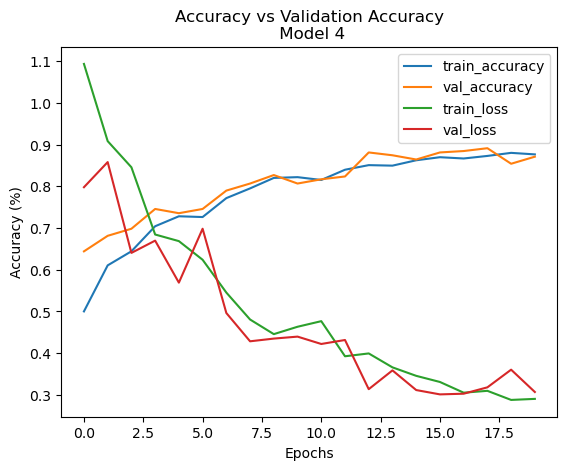

In [487]:
model4_loss = pd.DataFrame(model4.history.history)
model4_loss = model4_loss.rename(columns = {'accuracy': 'train_accuracy', 'loss': 'train_loss'})
model4_loss[['train_accuracy', 'val_accuracy', 'train_loss', 'val_loss']].plot()
plt.title("Accuracy vs Validation Accuracy\n Model 4")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.show()

In [488]:
max_val_acc4 = model4_loss.val_accuracy.max()
print("Maximum Validation Accuracy for Model:", round(max_val_acc4 * 100,2), "%")

Maximum Validation Accuracy for Model: 89.15 %


In [489]:
min_val_loss4 = model4_loss.val_loss.min()
print("Minimum Validation Loss for Model:", round(min_val_loss4 * 100,2), "%")

Minimum Validation Loss for Model: 30.09 %


**Takeaways:**

* The plot and the Validation Accuracy, Validation Loss numbers show an improvement over the previous models.

* The ELU Activation in the hidden layers appears to have worked well. 

* This model ran for 20 epochs, which helped it continue to improve, despite, a large Validation loss in the early epochs.

* Since we have a batch size of 10, this smaller batch size could also contribute to the variability in our models.

Let's view the Evaluation Metrics.

### Evaluation Metrics

In [490]:
# Get predictions
yp_4 = model4.predict(test_gen, steps = 688, verbose = 1)

688/688 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step 


In [491]:
yp4 = yp_4.argmax(axis = 1)

**Figure 18: Classification Report for Model 4**

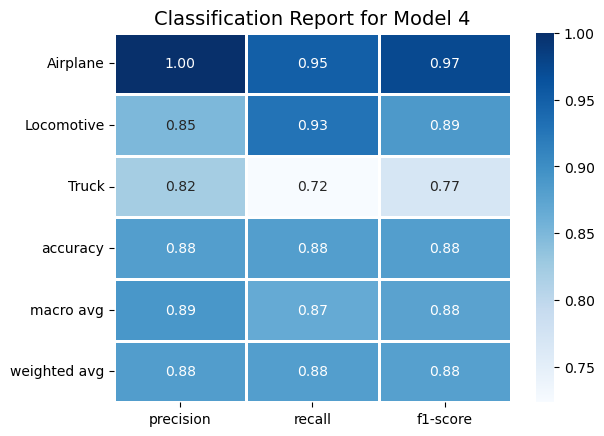

In [492]:
# Classification Report
test_labels = valid_gen.classes
names = ['Airplane', 'Locomotive', 'Truck']
clf_test = classification_report(test_labels, yp4, target_names = names, output_dict = True)

# Heatmap view
sns.heatmap(pd.DataFrame(clf_test).iloc[:-1, :].T, annot = True, cmap = "Blues", linewidth = 1, fmt = '.2f')
plt.title("Classification Report for Model 4", fontsize = 14)
plt.show()

**Summary of Classification Report for Model 4:**

* We see good performance for the Airplane and Locomotive classes
* The lowest scores were for the Truck class

Let's view the Confusion Matrix below to see the details.

**Figure 19: Confusion Matrix for Model 4**

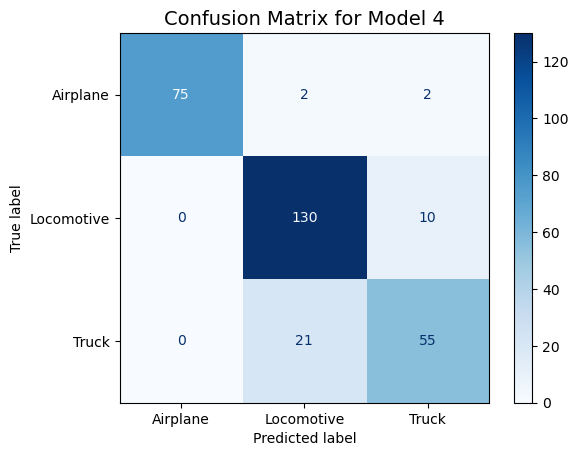

In [493]:
# Get labels and store confusion 
test_labels = valid_gen.classes
labels = ['Airplane', 'Locomotive', 'Truck']
#cm = confusion_matrix(test_labels, yp)

# Display confusion matrix
cm = confusion_matrix(test_labels, yp4)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(cmap = plt.cm.Blues) 
plt.title('Confusion Matrix for Model 4', fontsize = 14)
plt.grid(False)
plt.show()

**Summary for Confusion Matrix Model 4:**

* We see some issues with the Airplane and Locomotive image classes
* The biggest confusion was predicting a Truck class as a Locomotive

In [494]:
# Get F1-Score for Model 4
f1_mod4 = f1_score(test_labels, yp4, average = 'weighted')
print("F1-Score for Model 4:", round(f1_mod4,4))

#Get Accuracy score for Model 4
acc_mod4 = accuracy_score(test_labels, yp4)
print("Accuracy Score for Model 4:", round(acc_mod4,4))

F1-Score for Model 4: 0.8801
Accuracy Score for Model 4: 0.8814


**The overall Accuracy score with this model is decent; however, we want to improve our performance on the Truck images.**

Below, we used Categorical Focal Crossentropy with a larger weight for the Truck class in an effort to improve the performance on Truck images.

## Model 5:  Categorical Focal Crossentropy with larger Class weight for Truck

* **Class weights:** Since Model 4 had issues predicting the Truck class, we adjusted the class weights and set a larger weight on the Truck class.  These adjusted weights were utilized with the Categorical Focal Crossentropy loss in an effort to improve our performance on the Truck class.  First, we tried balanced weights and then we tried a larger class weight for the Truck class, which is shown below.
  
* **Hidden activation:** We utilized ReLU for the hidden layers since ELU did not clearly outperform ReLU in multiple iterations.

In [317]:
# Class_weights for CFC loss
#class_weights = sklearn.utils.class_weight.compute_class_weight('balanced', classes = np.unique(train_gen.classes),y = train_gen.classes)

In [427]:
# Set initial kernel size, pool size and filters
kernel_sz = (3,3)
pool_sz = (2,2)

# Number of filters with each layer
filters_1 = 32
filters_2 = 64
filters_3 = 128
filters_4 = 256

# Set class weights with larger value for truck
class_weights = np.array([1.0, 1.0, 1.2])

In [428]:
#Initialize model, set optimizer LR
model5 = Sequential()
optimizer = Adam(learning_rate = 0.0002)

In [429]:
# Use Average Pooling
model5.add(Conv2D(filters_1, kernel_sz, activation = 'relu', padding = 'same'))
model5.add(Conv2D(filters_1, kernel_sz, activation = 'relu', padding = 'same'))
model5.add(AveragePooling2D(pool_size = pool_sz, padding = 'same'))
model5.add(Dropout(0.25))

model5.add(Conv2D(filters_2, kernel_sz, activation = 'relu', padding = 'same'))
model5.add(Conv2D(filters_2, kernel_sz, activation = 'relu', padding = 'same'))
model5.add(AveragePooling2D(pool_size = pool_sz, padding = 'same'))
model5.add(Dropout(0.25))

model5.add(Conv2D(filters_3, kernel_sz, activation = 'relu', padding = 'same'))
model5.add(Conv2D(filters_3, kernel_sz, activation = 'relu', padding = 'same'))
model5.add(AveragePooling2D(pool_size = pool_sz, padding = 'same'))
model5.add(Dropout(0.25))

model5.add(Conv2D(filters_4, kernel_sz, activation = 'relu', padding = 'same'))
model5.add(Conv2D(filters_4, kernel_sz, activation = 'relu', padding = 'same'))
model5.add(AveragePooling2D(pool_size = pool_sz, padding = 'same'))
model5.add(Dropout(0.25))

model5.add(Flatten())
model5.add(Dense(256, activation = 'relu'))
model5.add(Dropout(0.25))
model5.add(Dense(units = 3, activation = 'softmax'))   

In [430]:
# Remember to compile()
model5.compile(loss = keras.losses.CategoricalFocalCrossentropy(alpha = class_weights, from_logits = False), 
               optimizer = optimizer, metrics = ['accuracy'])

In [431]:
# Set a reduced learning rate and early stopping
drop_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.5, patience = 1, verbose = 1, mode = 'max',
                           min_lr = 0.00001)

early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 5, restore_best_weights = True)

cb_lst = [drop_lr, early_stop]

In [432]:
history5 = model5.fit(train_gen, 
                    validation_data = valid_gen,
                    epochs = 20,
                    verbose = 1, 
                    callbacks = cb_lst)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.4991 - loss: 0.4794 - val_accuracy: 0.6475 - val_loss: 0.3383 - learning_rate: 2.0000e-04
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.6337 - loss: 0.3392 - val_accuracy: 0.6746 - val_loss: 0.2623 - learning_rate: 2.0000e-04
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7197 - loss: 0.2676
Epoch 3: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-05.
163/163 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.7196 - loss: 0.2677 - val_accuracy: 0.6610 - val_loss: 0.2525 - learning_rate: 2.0000e-04
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7416 - loss: 0.2162
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
163/163 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.7415 - loss: 0.2163 - val_accuracy: 0.6644 - val_loss: 0.2715 - learning_rate: 1.0000e-04
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - accuracy: 0.7462 

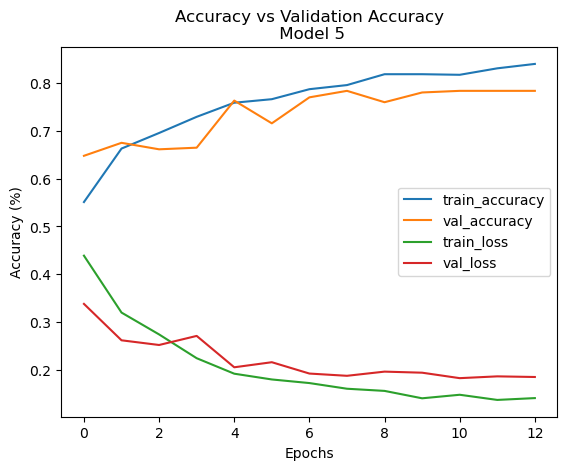

In [433]:
model5_loss = pd.DataFrame(model5.history.history)
model5_loss = model5_loss.rename(columns = {'accuracy': 'train_accuracy', 'loss': 'train_loss'})
model5_loss[['train_accuracy', 'val_accuracy', 'train_loss', 'val_loss']].plot()
plt.title("Accuracy vs Validation Accuracy\n Model 5")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.show()

In [434]:
max_val_acc5 = model5_loss.val_accuracy.max()
print("Maximum Validation Accuracy for Model:", round(max_val_acc5 * 100,2), "%")

Maximum Validation Accuracy for Model: 78.31 %


In [435]:
min_val_loss5 = model5_loss.val_loss.min()
print("Minimum Validation Loss for Model:", round(min_val_loss5 * 100,2), "%")

Minimum Validation Loss for Model: 18.33 %


**Summary:** Our results were worse.  Let's see if this model did better on the Truck class.

### Evaluation Metrics

In [436]:
# Get predictions
yp_5 = model5.predict(test_gen, steps = 688, verbose = 1)

688/688 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step 


In [439]:
# Convert
yp5 = yp_5.argmax(axis = 1)

**Figure 20: Classification Report for Model 5**

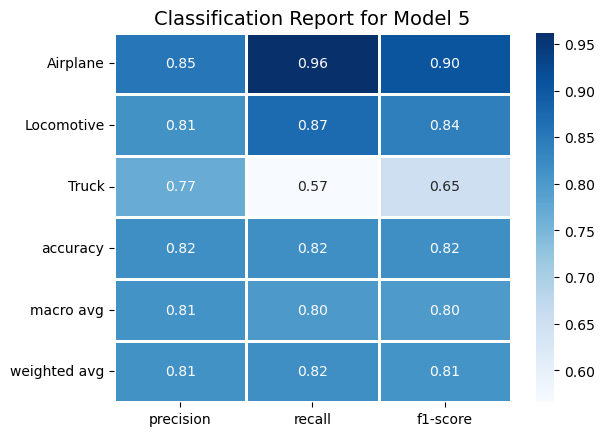

In [440]:
# Classification Report
test_labels = valid_gen.classes
names = ['Airplane', 'Locomotive', 'Truck']
clf_test = classification_report(test_labels, yp5, target_names = names, output_dict = True)

# Heatmap view
sns.heatmap(pd.DataFrame(clf_test).iloc[:-1, :].T, annot = True, cmap = "Blues", linewidth = 1, fmt = '.2f')
plt.title("Classification Report for Model 5", fontsize = 14)
plt.show()

**Summary of Classification Report for Model 5:**

* We see reasonably good performance for the Airplane and Locomotive classes
* The lowest scores were for the Truck class and these numbers are worse than Model 4 above

Let's view the Confusion Matrix below to see the details.

**Figure 21: Confusion Matrix for Model 5**

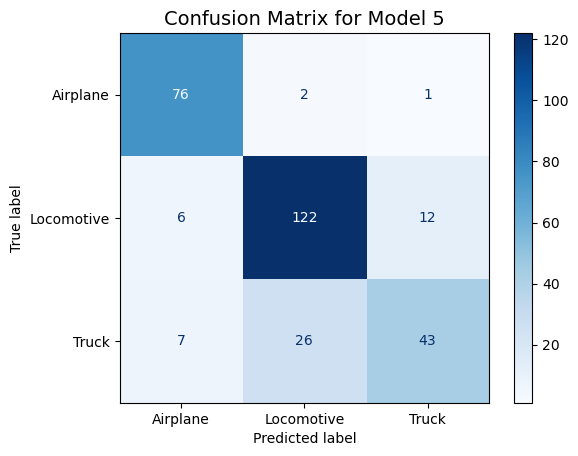

In [441]:
# Get labels and store confusion 
test_labels = valid_gen.classes
labels = ['Airplane', 'Locomotive', 'Truck']
#cm = confusion_matrix(test_labels, yp)

# Display confusion matrix
cm = confusion_matrix(test_labels, yp5)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(cmap = plt.cm.Blues) 
plt.title('Confusion Matrix for Model 5', fontsize = 14)
plt.grid(False)
plt.show()

**Summary for Confusion Matrix Model 5:**

* We see some issues with the Airplane and Locomotive image classes
* The biggest confusion was still between the Truck and Locomotive classes

In [442]:
# Get F1-Score for Model 5
f1_mod5 = f1_score(test_labels, yp5, average = 'weighted')
print("F1-Score for Model 5:", round(f1_mod5,4))

#Get Accuracy score for Model 5
acc_mod5 = accuracy_score(test_labels, yp5)
print("Accuracy Score for Model 5:", round(acc_mod5,4))

F1-Score for Model 5: 0.8094
Accuracy Score for Model 5: 0.8169


**Takeaways from above modeling efforts:**

* Experienced lowest loss values with:  Adam optimizer and increased number of epochs

* Batch Normalization was not improving our results

* Categorical Focal Crossentropy with balanced weights or heavier weights for the Truck class did not appear to improve the results

* ReLU and ELU Activations in the hidden layers appeared to generate similar results

## Model 9:   Increased Convolution Layers

**Number of Filters with each layer:**  For images, the recommendation was to increase the number of filters per layer.  Therefore, we add a fourth layer with the number of filters proceeding from 32 to 64 to 128 to 256.

**Conv2D:**  Since we have images, we use the Convolution 2D package with the above kernel size and filters.  The kernel initializer is he_normal.

**Dropout:**  The dropout is 0.25 for each layer to randomly mask 25% of the data and help prevent overfitting.

**Activation:**  Softmax activation for the output layers since we have multi-class classification.

**Optimizer:**  Learning Rate of 0.001 with Adam optimizer and set it to drop on plateau.

In [443]:
# Set initial kernel size, pool size and filters
kernel_sz = (3,3)
pool_sz = (2,2)

# Number of filters with each layer
filters_1 = 32
filters_2 = 64
filters_3 = 128
filters_4 = 256
optimizer = Adam(learning_rate = 0.001)

In [444]:
# Initialize model
model9 = Sequential()

In [445]:
# Build model
model9.add(Conv2D(filters_1, kernel_sz, activation = 'relu', kernel_initializer = 'he_normal')) 
model9.add(Conv2D(filters_1, kernel_sz, activation = 'relu', kernel_initializer = 'he_normal')) 
model9.add(MaxPooling2D(pool_size = pool_sz))
model9.add(Dropout(0.25))

model9.add(Conv2D(filters_2, kernel_sz, activation = 'relu', kernel_initializer = 'he_normal'))
model9.add(Conv2D(filters_2, kernel_sz, activation = 'relu', kernel_initializer = 'he_normal'))
model9.add(MaxPooling2D(pool_size = pool_sz))
model9.add(Dropout(0.25))

model9.add(Conv2D(filters_3, kernel_sz, activation = 'relu',kernel_initializer = 'he_normal'))
model9.add(Conv2D(filters_3, kernel_sz, activation = 'relu',kernel_initializer = 'he_normal'))
model9.add(Conv2D(filters_3, kernel_sz, activation = 'relu',kernel_initializer = 'he_normal'))
model9.add(MaxPooling2D(pool_size = pool_sz))
model9.add(Dropout(0.25))

model9.add(Conv2D(filters_4, kernel_sz, activation = 'relu', kernel_initializer = 'he_normal'))
model9.add(Conv2D(filters_4, kernel_sz, activation = 'relu', kernel_initializer = 'he_normal'))
model9.add(Conv2D(filters_4, kernel_sz, activation = 'relu', kernel_initializer = 'he_normal'))
model9.add(MaxPooling2D(pool_size = pool_sz))
model9.add(Dropout(0.25))

model9.add(Flatten())
model9.add(Dense(256, activation = 'relu')) 
model9.add(Dropout(0.25))
model9.add(Dense(units = 3, activation = 'softmax'))   

In [446]:
# Compile model
model9.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [447]:
# Set a reduced learning rate and early stopping
drop_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.5, patience = 2, verbose = 1, mode = 'max',
                           min_lr = 0.000001)

early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 7, restore_best_weights = True)

cb_lst = [drop_lr, early_stop]

In [448]:
history9 = model9.fit(train_gen, 
                    validation_data = valid_gen,
                    epochs = 24,
                    verbose = 1, 
                    callbacks = cb_lst)

Epoch 1/24
163/163 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.4338 - loss: 3.3418 - val_accuracy: 0.4746 - val_loss: 1.0643 - learning_rate: 0.0010
Epoch 2/24
163/163 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.4800 - loss: 1.0190 - val_accuracy: 0.6271 - val_loss: 0.8344 - learning_rate: 0.0010
Epoch 3/24
163/163 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.6518 - loss: 0.7975 - val_accuracy: 0.6644 - val_loss: 0.7397 - learning_rate: 0.0010
Epoch 4/24
163/163 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.6886 - loss: 0.7385 - val_accuracy: 0.7186 - val_loss: 0.6376 - learning_rate: 0.0010
Epoch 5/24
163/163 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.6939 - loss: 0.6784 - val_accuracy: 0.7186 - val_loss: 0.5885 - learning_rate: 0.0010
Epoch 6/24
163/163 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.7406 - loss: 0.6217 - val_accuracy: 0.7288 - val_loss: 0.5872 - learning_rate: 0.0010
Epoch 7/24
163/163 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.7290 - loss: 0.

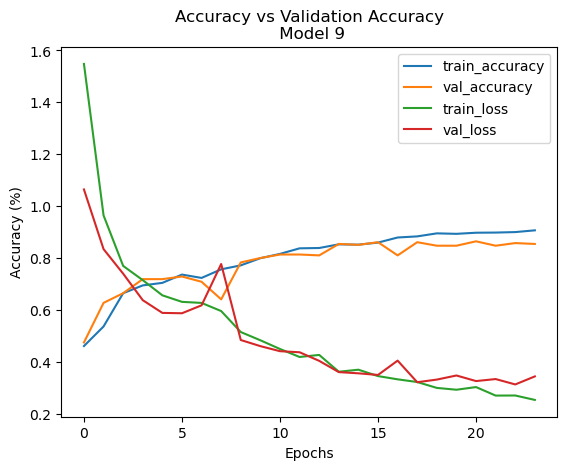

In [449]:
model9_loss = pd.DataFrame(model9.history.history)
model9_loss = model9_loss.rename(columns = {'accuracy': 'train_accuracy', 'loss': 'train_loss'})
model9_loss[['train_accuracy', 'val_accuracy', 'train_loss', 'val_loss']].plot()
plt.title("Accuracy vs Validation Accuracy\n Model 9")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.show()

**Note:  Variability in Accuracy and Loss plots across Epochs**

In [450]:
max_val_acc9 = model9_loss.val_accuracy.max()
print("Maximum Validation Accuracy for Model:", round(max_val_acc9 * 100,2), "%")

Maximum Validation Accuracy for Model: 86.44 %


In [451]:
min_val_loss9 = model9_loss.val_loss.min()
print("Minimum Validation Loss for Model:", round(min_val_loss9 * 100,2), "%")

Minimum Validation Loss for Model: 31.28 %


**Summary:  These were decent results; however, the Validation Accuracy was lower than Model 4 and the Validation Loss was higher.  Let's check the predictions.**

### Evaluation Metrics

In [452]:
# Get predictions
yp_9 = model9.predict(test_gen, steps = 688, verbose = 1)

688/688 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step 


In [453]:
# Convert
yp9 = yp_9.argmax(axis = 1)

**Figure 22: Classification Report for Model 9**

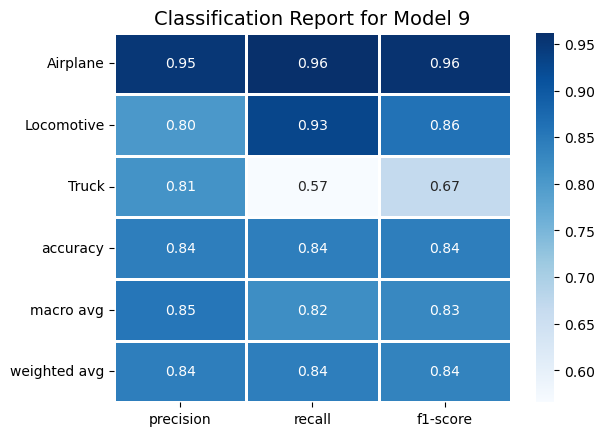

In [699]:
# Classification Report
test_labels = valid_gen.classes
names = ['Airplane', 'Locomotive', 'Truck']
clf_test = classification_report(test_labels, yp9, target_names = names, output_dict = True)
# Heatmap view
sns.heatmap(pd.DataFrame(clf_test).iloc[:-1, :].T, annot = True, cmap = "Blues", linewidth = 1, fmt = '.2f')
plt.title("Classification Report for Model 9", fontsize = 14)
plt.show()

**Summary of Classification Report**

* Again, we see the best performance on Airplane images followed by Locomotive images.

* The largest improvement in the F1-Score compared to Model 5 was on the Airplane images.

* For the Truck class, the Precision score was solid, but the Recall score was poor -- which also resulted in a lower F1-Score than desired.

Let's view the Confusion Matrix below.

**Figure 23: Confusion Matrix for Model 9**

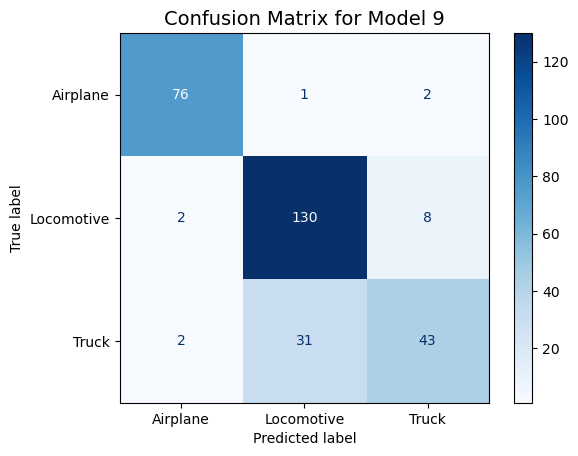

In [698]:
# Get labels and store confusion 
test_labels = valid_gen.classes
labels = ['Airplane', 'Locomotive', 'Truck']
# Display confusion matrix
cm = confusion_matrix(test_labels, yp9)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(cmap = plt.cm.Blues) 
plt.title('Confusion Matrix for Model 9', fontsize = 14)
plt.grid(False)
plt.show()

**Summary of Confusion Matrix:**

* We see few errors on the Airplane images

* The largest number of errors were Truck images mistakenly predicted as Locomotive.

In [456]:
# Get F1-Score for Model 9
f1_mod9 = f1_score(test_labels, yp9, average = 'weighted')
print("F1-Score for Model 9:", round(f1_mod9,4))

#Get Accuracy score for Model
acc_mod9 = accuracy_score(test_labels, yp9)
print("Accuracy Score for Model 9:", round(acc_mod9,4))

F1-Score for Model 9: 0.8363
Accuracy Score for Model 9: 0.8441


**Note:  Layer Normalization, Batch Normalization and Leaky ReLU were all tried but did not perform better than the models shown, so those iterations have been removed from the notebook.**

## Model 16:  Single Convolution Layers with Average Pooling 

* **Convolution Layers:** Here we try single Convolution 2D layers per batch and a fifth layer of filters.

* **Pooling:** The better results above were experienced with Average Pooling, instead of Max Pooling
  
* **Dropout:** There is a single Dropout layer between the final two Dense layers.

* **Dense Layers:** There is a Dense layer before the single Dropout layer, followed by the final Dense layer with Softmax activation set to 3 classes.

In [541]:
# kernel size, pool size and filters
kernel_sz = (3,3)
pool_sz = (2,2)

# Number of filters with each layer
filters_1 = 32
filters_2 = 64
filters_3 = 96
filters_4 = 128
filters_5 = 256

optimizer = Adam(learning_rate = 0.001)

In [542]:
# Initialize
model16 = Sequential()

In [543]:
# Add layers to model
# Batch 1
model16.add(Conv2D(filters_1, kernel_sz, activation = 'relu', padding = 'same',kernel_initializer = 'he_uniform')) 
model16.add(AveragePooling2D(pool_size = pool_sz, padding ='same'))

#Batch 2
model16.add(Conv2D(filters_2, kernel_sz, activation = 'relu', padding = 'same',kernel_initializer = 'he_uniform'))
model16.add(AveragePooling2D(pool_size = pool_sz, padding ='same'))

# Batch 3
model16.add(Conv2D(filters_3, kernel_sz, activation = 'relu', padding = 'same',kernel_initializer = 'he_uniform'))
model16.add(AveragePooling2D(pool_size = pool_sz, padding ='same'))

# Batch 4
model16.add(Conv2D(filters_4, kernel_sz, activation = 'relu', padding = 'same',kernel_initializer = 'he_uniform'))
model16.add(AveragePooling2D(pool_size = pool_sz, padding ='same'))

# Batch 5
model16.add(Conv2D(filters_5, kernel_sz, activation = 'relu', padding = 'same',kernel_initializer = 'he_uniform'))
model16.add(AveragePooling2D(pool_size = pool_sz, padding ='same'))

# Flatten and convert to Dense layer
model16.add(Flatten())
model16.add(Dense(256, activation = 'relu'))
model16.add(Dropout(0.50))
model16.add(Dense(units = 3, activation = 'softmax'))  # 

In [544]:
# Compile model
model16.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [545]:
# Set a reduced learning rate and early stopping
drop_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.5, patience = 2, verbose = 1, mode = 'max',
                           min_lr = 0.00001)

early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 5, restore_best_weights = True)

cb_lst = [drop_lr, early_stop]

In [546]:
history16 = model16.fit(train_gen, 
                    validation_data = valid_gen,
                    epochs = 10,
                    verbose = 1, 
                    callbacks = cb_lst)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 263ms/step - accuracy: 0.5100 - loss: 1.4305 - val_accuracy: 0.6712 - val_loss: 0.7955 - learning_rate: 0.0010
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 274ms/step - accuracy: 0.6700 - loss: 0.7802 - val_accuracy: 0.7085 - val_loss: 0.6277 - learning_rate: 0.0010
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 281ms/step - accuracy: 0.7129 - loss: 0.6849 - val_accuracy: 0.7085 - val_loss: 0.6984 - learning_rate: 0.0010
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 284ms/step - accuracy: 0.7243 - loss: 0.6764 - val_accuracy: 0.7356 - val_loss: 0.6068 - learning_rate: 0.0010
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 47s 287ms/step - accuracy: 0.7720 - loss: 0.5828 - val_accuracy: 0.7627 - val_loss: 0.5361 - learning_rate: 0.0010
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 47s 291ms/step - accuracy: 0.7856 - loss: 0.5311 - val_accuracy: 0.7898 - val_loss: 0.4995 - learning_rate: 0.0010
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 48s 292ms/step - accuracy: 0.8

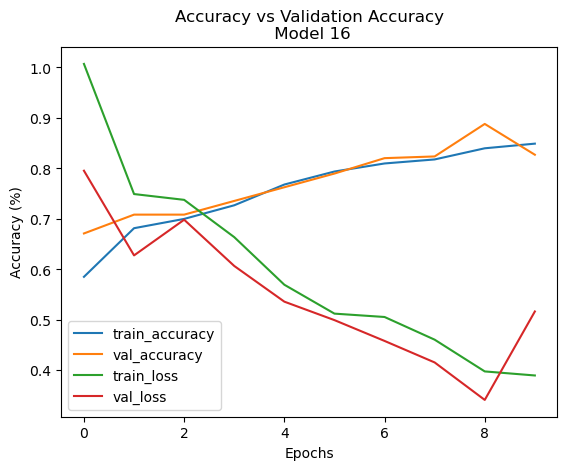

In [549]:
# View plot
model16_loss = pd.DataFrame(model16.history.history)
model16_loss = model16_loss.rename(columns = {'accuracy': 'train_accuracy', 'loss': 'train_loss'})
model16_loss[['train_accuracy', 'val_accuracy', 'train_loss', 'val_loss']].plot()
plt.title("Accuracy vs Validation Accuracy\n Model 16")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.show()

In [550]:
max_val_acc16 = model16_loss.val_accuracy.max()
print("Maximum Validation Accuracy for Model:", round(max_val_acc16 * 100,2), "%")

Maximum Validation Accuracy for Model: 88.81 %


In [551]:
min_val_loss16 = model16_loss.val_loss.min()
print("Minimum Validation Loss for Model:", round(min_val_loss16 * 100,2), "%")

Minimum Validation Loss for Model: 34.15 %


**We see an interesting decrease in the Validation Accuracy with the increase in Validation Loss before reaching the tenth epoch.**

### Evaluation Metrics

In [552]:
# Get predictions
yp_16 = model16.predict(test_gen, steps = 688, verbose = 1)

688/688 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step 


In [553]:
yp16 = yp_16.argmax(axis = 1)

**Figure 24:  Classification Report for Model 16**

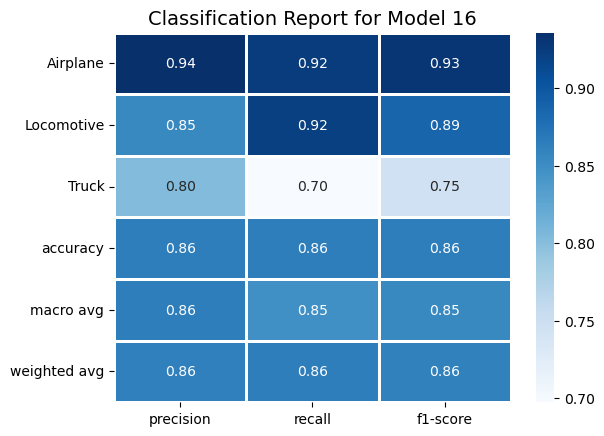

In [554]:
# Classification Report
test_labels = valid_gen.classes
names = ['Airplane', 'Locomotive', 'Truck']
clf_test = classification_report(test_labels, yp16, target_names = names, output_dict = True)
# Heatmap view
sns.heatmap(pd.DataFrame(clf_test).iloc[:-1, :].T, annot = True, cmap = "Blues", linewidth = 1, fmt = '.2f')
plt.title("Classification Report for Model 16", fontsize = 14)
plt.show()

**Summary of Classification Report:**

* Interestingly, this model did not perform quite as well on the Airplane images as some previous models.

* However, this model did perform better on the Truck images than some previous models.

Let's view the Confusion Matrix below.

**Figure 25: Confusion Matrix for Model 16**

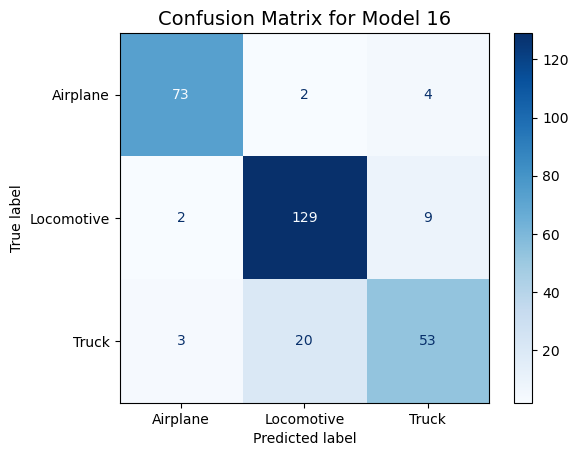

In [555]:
# Get labels and store confusion 
test_labels = valid_gen.classes
labels = ['Airplane', 'Locomotive', 'Truck']
# Display confusion matrix
cm = confusion_matrix(test_labels, yp16)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(cmap = plt.cm.Blues) 
plt.title('Confusion Matrix for Model 16', fontsize = 14)
plt.grid(False)
plt.show()

**Summary of Confusion Matrix:**

* Here we see the additional errors with the Airplane images being confused with Locomotive or Truck images.

* The best improvement is with fewer Truck images being mis-labeled as Locomotive; however, we still want to improve our performance on the Truck images.

In [556]:
# Get F1-Score for Model 
f1_mod16 = f1_score(test_labels, yp16, average = 'weighted')
print("F1-Score for Model 16:", round(f1_mod16,4))

#Get Accuracy score for Model
acc_mod16 = accuracy_score(test_labels, yp16)
print("Accuracy Score for Model 16:", round(acc_mod16,4))

F1-Score for Model 16: 0.8621
Accuracy Score for Model 16: 0.8644


## Model 20:  Single Convolution Layers with Average Pooling, Add Epochs

* **Epochs:** Here we tried additional epochs to see if the model could learn and improve beyond the ten epochs in Model 16 above.

* **Patience:** We increased our patience in Early Stop, since the model runs for 24 epochs.

In [579]:
# kernel size, pool size and filters
kernel_sz = (3,3)
pool_sz = (2,2)

# Number of filters with each layer
filters_1 = 32
filters_2 = 64
filters_3 = 96
filters_4 = 128
filters_5 = 256

optimizer = Adam(learning_rate = 0.001)

In [580]:
# Initialize
model20 = Sequential()

In [581]:
# Add layers to model
# Batch 1
model20.add(Conv2D(filters_1, kernel_sz, activation = 'relu', padding = 'same',kernel_initializer = 'he_uniform')) 
model20.add(AveragePooling2D(pool_size = pool_sz, padding ='same'))

#Batch 2
model20.add(Conv2D(filters_2, kernel_sz, activation = 'relu', padding = 'same',kernel_initializer = 'he_uniform'))
model20.add(AveragePooling2D(pool_size = pool_sz, padding ='same'))

# Batch 3
model20.add(Conv2D(filters_3, kernel_sz, activation = 'relu', padding = 'same',kernel_initializer = 'he_uniform'))
model20.add(AveragePooling2D(pool_size = pool_sz, padding ='same'))

# Batch 4
model20.add(Conv2D(filters_4, kernel_sz, activation = 'relu', padding = 'same',kernel_initializer = 'he_uniform'))
model20.add(AveragePooling2D(pool_size = pool_sz, padding ='same'))

# Batch 5
model20.add(Conv2D(filters_5, kernel_sz, activation = 'relu', padding = 'same',kernel_initializer = 'he_uniform'))
model20.add(AveragePooling2D(pool_size = pool_sz, padding ='same'))

# Flatten and convert to Dense layer
model20.add(Flatten())
model20.add(Dense(256, activation = 'relu'))
model20.add(Dropout(0.50))
model20.add(Dense(units = 3, activation = 'softmax'))  # 

In [582]:
# Compile
model20.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [583]:
# Set a reduced learning rate and early stopping
drop_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.5, patience = 2, verbose = 1, mode = 'max',
                           min_lr = 0.00001)

early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 7, restore_best_weights = True)

cb_lst = [drop_lr, early_stop]

In [584]:
history20 = model20.fit(train_gen, 
                    validation_data = valid_gen,
                    epochs = 24,
                    verbose = 1, 
                    callbacks = cb_lst)

Epoch 1/24
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 264ms/step - accuracy: 0.4836 - loss: 1.5576 - val_accuracy: 0.6441 - val_loss: 0.8232 - learning_rate: 0.0010
Epoch 2/24
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 276ms/step - accuracy: 0.6372 - loss: 0.8386 - val_accuracy: 0.6271 - val_loss: 0.7722 - learning_rate: 0.0010
Epoch 3/24
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 282ms/step - accuracy: 0.6623 - loss: 0.7658 - val_accuracy: 0.7254 - val_loss: 0.5821 - learning_rate: 0.0010
Epoch 4/24
163/163 ━━━━━━━━━━━━━━━━━━━━ 47s 287ms/step - accuracy: 0.7311 - loss: 0.6539 - val_accuracy: 0.7458 - val_loss: 0.5594 - learning_rate: 0.0010
Epoch 5/24
163/163 ━━━━━━━━━━━━━━━━━━━━ 48s 294ms/step - accuracy: 0.7337 - loss: 0.6466 - val_accuracy: 0.7831 - val_loss: 0.4967 - learning_rate: 0.0010
Epoch 6/24
163/163 ━━━━━━━━━━━━━━━━━━━━ 48s 291ms/step - accuracy: 0.7852 - loss: 0.5287 - val_accuracy: 0.7797 - val_loss: 0.5041 - learning_rate: 0.0010
Epoch 7/24
163/163 ━━━━━━━━━━━━━━━━━━━━ 48s 292ms/step - accuracy: 0.7

**Note:  Set patience to 7 in Early Stopping to allow for LR adjustments.**

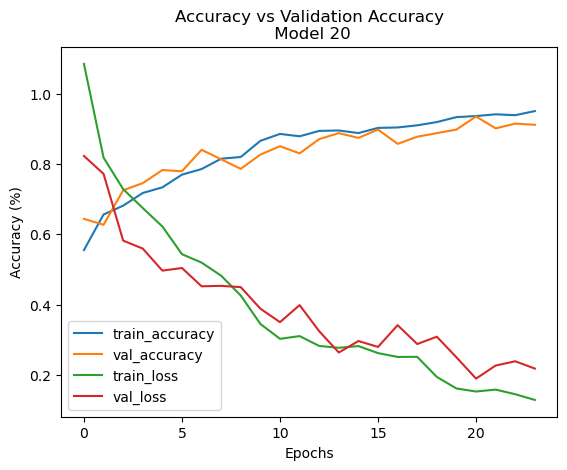

In [585]:
# View plot
model20_loss = pd.DataFrame(model20.history.history)
model20_loss = model20_loss.rename(columns = {'accuracy': 'train_accuracy', 'loss': 'train_loss'})
model20_loss[['train_accuracy', 'val_accuracy', 'train_loss', 'val_loss']].plot()
plt.title("Accuracy vs Validation Accuracy\n Model 20")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.show()

In [586]:
max_val_acc20 = model20_loss.val_accuracy.max()
print("Maximum Validation Accuracy for Model:", round(max_val_acc20 * 100,2), "%")

Maximum Validation Accuracy for Model: 93.56 %


In [587]:
min_val_loss20 = model20_loss.val_loss.min()
print("Minimum Validation Loss for Model:", round(min_val_loss20 * 100,2), "%")

Minimum Validation Loss for Model: 18.92 %


**This Validation Accuracy is our best yet.  Let's view the Evaluation Metrics below.**

### Evaluation Metrics

In [588]:
# Get predictions
yp_20 = model20.predict(test_gen, steps = 688, verbose = 1)

688/688 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step 


In [589]:
#convert
yp20 = yp_20.argmax(axis = 1)

**Figure 26: Classification Report for Model 20**

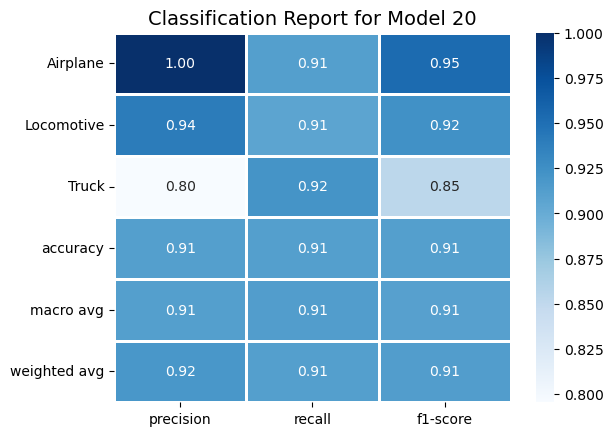

In [591]:
# Classification Report
test_labels = valid_gen.classes
names = ['Airplane', 'Locomotive', 'Truck']
clf_test = classification_report(test_labels, yp20, target_names = names, output_dict = True)
# Heatmap view
sns.heatmap(pd.DataFrame(clf_test).iloc[:-1, :].T, annot = True, cmap = "Blues", linewidth = 1, fmt = '.2f')
plt.title("Classification Report for Model 20", fontsize = 14)
plt.show()

**Summary of Classification Report for Model 20:**

* We see overall good performance and it performed particularly well on the Airplane images.

* The performance on Truck images has improved, although, the model is still not performing as well on these images.  

Next, let's view the Confusion Matrix.

**Figure 27: Confusion Matrix for Model 20**

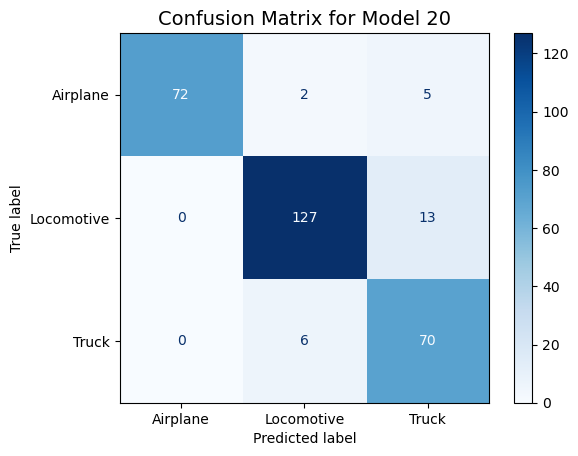

In [592]:
# Get labels and store confusion 
test_labels = valid_gen.classes
labels = ['Airplane', 'Locomotive', 'Truck']
# Display confusion matrix
cm = confusion_matrix(test_labels, yp20)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(cmap = plt.cm.Blues) 
plt.title('Confusion Matrix for Model 20', fontsize = 14)
plt.show()

**Summary of Confusion Matrix for Model 20:**

Here we see the model performed extremely well on the Airplane images while the most confusion occurred between Locomotive and Truck images.

In [593]:
# Get F1-Score for Model 
f1_mod20 = f1_score(test_labels, yp20, average = 'weighted')
print("F1-Score for Model 20:", round(f1_mod20,4))

#Get Accuracy score for Model
acc_mod20 = accuracy_score(test_labels, yp20)
print("Accuracy Score for Model 20:", round(acc_mod20,4))

F1-Score for Model 20: 0.9136
Accuracy Score for Model 20: 0.9119


**Next, we tried to improve further upon the Truck images**

## Model 21: Single Convolution Layers with RMSprop Optimizer and Average Pooling

**Optimizer:** The usage of RMSprop (Root Mean Squared Propagation) optimizer, which utilizes a moving average of squared gradients to adapt the Learning Rate, in an effort to reduce the fluctuations in our models.

**Epochs:** Increased number of epochs to 30, while having Learning Rate reduce if it plateaus and setting Early Stop.

In [614]:
# kernel size, pool size and filters
kernel_sz = (3,3)
pool_sz = (2,2)

# Number of filters with each layer
filters_1 = 32
filters_2 = 64
filters_3 = 96
filters_4 = 128
filters_5 = 256

optimizer = RMSprop(learning_rate = 0.001)

In [615]:
# Initialize model
model21 = Sequential()

In [616]:
# Add layers to model
# Batch 1
model21.add(Conv2D(filters_1, kernel_sz, activation = 'relu', padding = 'same',kernel_initializer = 'he_uniform')) 
model21.add(AveragePooling2D(pool_size = pool_sz, padding ='same'))

#Batch 2
model21.add(Conv2D(filters_2, kernel_sz, activation = 'relu', padding = 'same',kernel_initializer = 'he_uniform'))
model21.add(AveragePooling2D(pool_size = pool_sz, padding ='same'))

# Batch 3
model21.add(Conv2D(filters_3, kernel_sz, activation = 'relu', padding = 'same',kernel_initializer = 'he_uniform'))
model21.add(AveragePooling2D(pool_size = pool_sz, padding ='same'))

# Batch 4
model21.add(Conv2D(filters_4, kernel_sz, activation = 'relu', padding = 'same',kernel_initializer = 'he_uniform'))
model21.add(AveragePooling2D(pool_size = pool_sz, padding ='same'))

# Batch 5
model21.add(Conv2D(filters_5, kernel_sz, activation = 'relu', padding = 'same',kernel_initializer = 'he_uniform'))
model21.add(AveragePooling2D(pool_size = pool_sz, padding ='same'))


# Flatten and convert to Dense layer
model21.add(Flatten())
model21.add(Dense(256, activation = 'relu'))
model21.add(Dropout(0.50))
model21.add(Dense(units = 3, activation = 'softmax'))  

In [617]:
# Compile model
model21.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [618]:
# Set a reduced learning rate and early stopping
drop_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.5, patience = 2, verbose = 1, mode = 'max',
                           min_lr = 0.00001)

early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 7, restore_best_weights = True)

cb_lst = [drop_lr, early_stop]

In [619]:
history21 = model21.fit(train_gen, 
                    validation_data = valid_gen,
                    epochs = 30,
                    verbose = 1, 
                    callbacks = cb_lst)

Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 264ms/step - accuracy: 0.4635 - loss: 3.7143 - val_accuracy: 0.6373 - val_loss: 0.8082 - learning_rate: 0.0010
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 271ms/step - accuracy: 0.6753 - loss: 0.7819 - val_accuracy: 0.7220 - val_loss: 0.6979 - learning_rate: 0.0010
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 281ms/step - accuracy: 0.7250 - loss: 0.7069 - val_accuracy: 0.7627 - val_loss: 0.5551 - learning_rate: 0.0010
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 280ms/step - accuracy: 0.7726 - loss: 0.6128 - val_accuracy: 0.8102 - val_loss: 0.5044 - learning_rate: 0.0010
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 283ms/step - accuracy: 0.7745 - loss: 0.5590 - val_accuracy: 0.8373 - val_loss: 0.3836 - learning_rate: 0.0010
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 47s 286ms/step - accuracy: 0.8176 - loss: 0.4904 - val_accuracy: 0.8237 - val_loss: 0.4240 - learning_rate: 0.0010
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.82

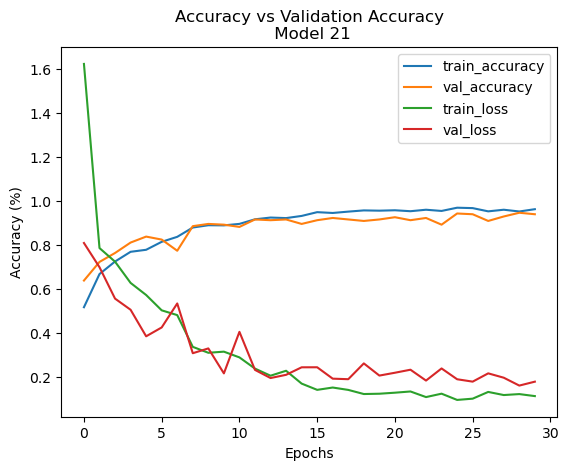

In [620]:
# View plot
model21_loss = pd.DataFrame(model21.history.history)
model21_loss = model21_loss.rename(columns = {'accuracy': 'train_accuracy', 'loss': 'train_loss'})
model21_loss[['train_accuracy', 'val_accuracy', 'train_loss', 'val_loss']].plot()
plt.title("Accuracy vs Validation Accuracy\n Model 21")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.show()

In [621]:
max_val_acc21 = model21_loss.val_accuracy.max()
print("Maximum Validation Accuracy for Model:", round(max_val_acc21 * 100,2), "%")

Maximum Validation Accuracy for Model: 94.58 %


In [622]:
min_val_loss21 = model21_loss.val_loss.min()
print("Minimum Validation Loss for Model:", round(min_val_loss21 * 100,2), "%")

Minimum Validation Loss for Model: 15.94 %


**Summary:**  These are our best results yet and the additional epochs led to improved Validation Accuracy.  Let's view the Evaluation Metrics below.

### Evaluation Metrics

In [623]:
# Get predictions
yp_21 = model21.predict(test_gen, steps = 688, verbose = 1)

688/688 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step 


In [624]:
# Convert
yp21 = yp_21.argmax(axis = 1)

**Figure 28: Classification Report for Model 21**

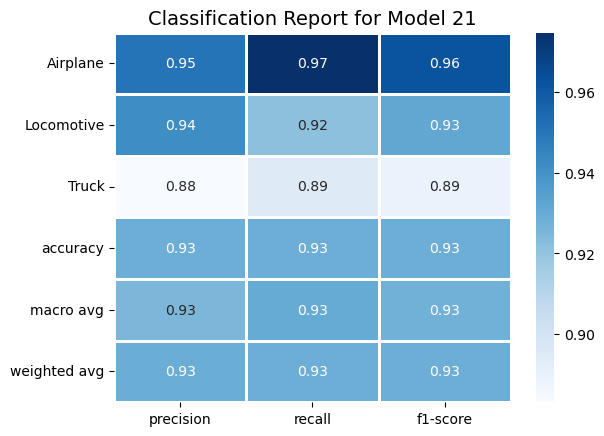

In [700]:
# Classification Report
test_labels = valid_gen.classes
names = ['Airplane', 'Locomotive', 'Truck']
clf_test = classification_report(test_labels, yp21, target_names = names, output_dict = True)

# Heatmap view
sns.heatmap(pd.DataFrame(clf_test).iloc[:-1, :].T, annot = True, cmap = "Blues", linewidth = 1, fmt = '.2f')
plt.title("Classification Report for Model 21", fontsize = 14)
plt.show()

**Summary of Classification Report:**

* This model predicted well on all three classes.

* Although, it also performed better on Airplane and Locomotive images than Truck images.  

Let's view the Confusion Matrix below.

**Figure 29: Confusion Matrix for Model 21**

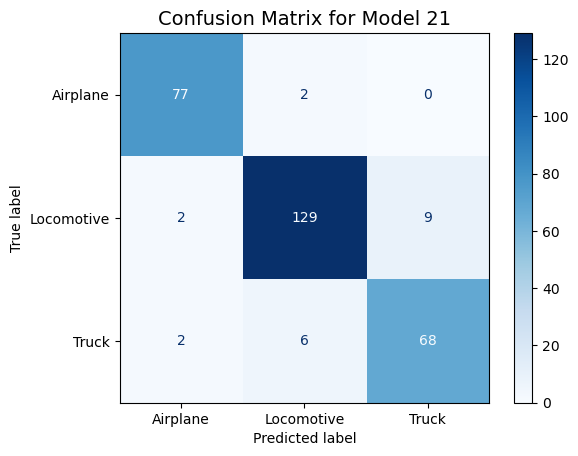

In [626]:
# Get labels and store confusion 
test_labels = valid_gen.classes
labels = ['Airplane', 'Locomotive', 'Truck']

# Display confusion matrix
cm = confusion_matrix(test_labels, yp21)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(cmap = plt.cm.Blues) 
plt.title('Confusion Matrix for Model 21', fontsize = 14)
plt.grid(False)
plt.show()

**Summary of Confusion Matrix:**

* While we see a couple errors on the Airplane images, this model clearly performed the best on our Truck images.

* This model was our best performing model across all three classes of images.

Next, let's view a summary of this model then check how a pre-trained ResNet model or Support Vector Classification (SVC) performs on this multi-class classification problem.

In [629]:
# Get F1-Score for Model 
f1_mod21 = f1_score(test_labels, yp21, average = 'weighted')
print("F1-Score for Model 21:", round(f1_mod21,4))

#Get Accuracy score for Model
acc_mod21 = accuracy_score(test_labels, yp21)
print("Accuracy Score for Model 21:", round(acc_mod21,4))

F1-Score for Model 21: 0.9288
Accuracy Score for Model 21: 0.9288


In [720]:
# Save model
model21.save_weights('cnn_model21.weights.h5')  

In [637]:
# View summary of model
model21.summary()

Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_236 (Conv2D)             │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_73            │ (None, 128, 128, 32)   │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_237 (Conv2D)             │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_74            │ (None, 64, 64, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_238 (Conv2D)             │ (None, 64, 64, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_75            │ (None, 32, 32, 96)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_239 (Conv2D)             │ (None, 32, 32, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_76            │ (None, 16, 16, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_240 (Conv2D)             │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_77            │ (None, 8, 8, 256)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_33 (Flatten)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_122 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,352,008 (35.68 MB)

 Trainable params: 4,676,003 (17.84 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,676,005 (17.84 MB)

**Note:** Model 21 Summary shows a total of trainable and non-trainable parameters.  We can compare these numbers to the pre-trained ResNet model below.  

## ResNet Pre-trained Model

Next, let's see how the pre-trained ResNet 50 model works on this data.  To start, we load the model and then we set the final Dense and Dropout layers.  Most importantly, our last layer is the Dense layer with 3 units for our 3 classes and a Softmax activation function.

### Load ResNet Model

First, we import the keras application, then we modified our generators and image size for the ResNet model.  We explored both an image size of (256,256) as well as (224,224) which ResNet was originally trained on.  However, the model performed similarly on this data with either image size.  

In [631]:
#import
import keras.applications as tfka

In [634]:
# Set weights to imagenet
res_net = tfka.ResNet50(weights = 'imagenet', include_top = False, input_shape = (256,256,3))

In [635]:
# Resnet model with added final Dense and Dropout layers
res_net.trainable = False
res_net_model = Sequential([res_net, 
                            Flatten(), 
                           Dense(1024, activation = 'relu'),
                           Dropout(0.5),
                           Dense(3, activation = 'softmax')])

### View ResNet Parameters

Here we can see how the number of Trainable and Non-trainable parameters in the ResNet model compare to our best performing Model 21 above.

In [636]:
#View model summary
res_net_model.summary()

Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_34 (Flatten)            │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 1024)           │   134,218,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_123 (Dropout)           │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,809,539 (602.00 MB)

 Trainable params: 134,221,827 (512.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

**Summary:** From the model summary, we see substantially more parameters in the pre-trained ResNet model than our Model 21 above.  Next, let's compile and run this model to see how it performs.

In [638]:
# Set optimizer and compile resnet model
optimizer = Adam(learning_rate = 0.00001)
# Compile model
res_net_model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [639]:
# Set a reduced learning rate and early stopping
drop_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.5, patience = 2, verbose = 1, mode = 'max',
                           min_lr = 0.0000001)

early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 7, restore_best_weights = True)

cb_lst = [drop_lr, early_stop]

In [640]:
history_rn = res_net_model.fit(train_gen, 
                    validation_data = valid_gen,
                    epochs = 15,
                    verbose = 1, 
                    callbacks = cb_lst)

Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 841ms/step - accuracy: 0.4344 - loss: 1.4230 - val_accuracy: 0.6542 - val_loss: 0.8130 - learning_rate: 1.0000e-05
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 145s 888ms/step - accuracy: 0.6028 - loss: 0.8643 - val_accuracy: 0.6915 - val_loss: 0.6977 - learning_rate: 1.0000e-05
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 152s 931ms/step - accuracy: 0.6737 - loss: 0.7577 - val_accuracy: 0.7186 - val_loss: 0.6462 - learning_rate: 1.0000e-05
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 153s 936ms/step - accuracy: 0.7205 - loss: 0.6525 - val_accuracy: 0.6847 - val_loss: 0.6897 - learning_rate: 1.0000e-05
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 878ms/step - accuracy: 0.7083 - loss: 0.6898
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
163/163 ━━━━━━━━━━━━━━━━━━━━ 158s 972ms/step - accuracy: 0.7082 - loss: 0.6898 - val_accuracy: 0.7153 - val_loss: 0.6546 - learning_rate: 1.0000e-05
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 156s 95

**Note: This ResNet model did not outperform our CNN models above.  Let's view the plots.**

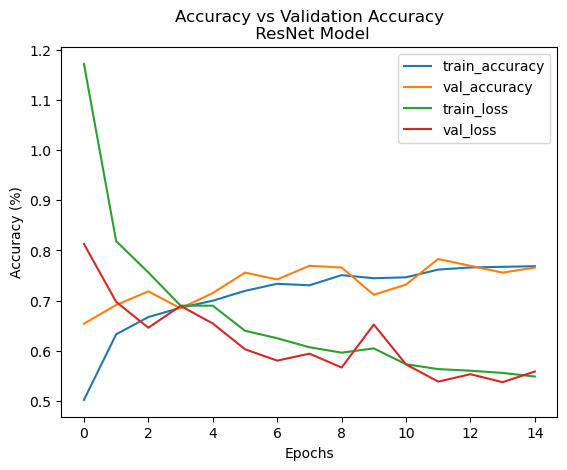

In [641]:
# View plot
res_net_model_loss = pd.DataFrame(res_net_model.history.history)
res_net_model_loss = res_net_model_loss.rename(columns = {'accuracy': 'train_accuracy', 'loss': 'train_loss'})
res_net_model_loss[['train_accuracy', 'val_accuracy', 'train_loss', 'val_loss']].plot()
plt.title("Accuracy vs Validation Accuracy\n ResNet Model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.show()

In [642]:
max_val_accRN = res_net_model_loss.val_accuracy.max()
print("Maximum Validation Accuracy for Model:", round(max_val_accRN * 100,2), "%")

Maximum Validation Accuracy for Model: 78.31 %


In [643]:
min_val_lossRN = res_net_model_loss.val_loss.min()
print("Minimum Validation Loss for Model:", round(min_val_lossRN * 100,2), "%")

Minimum Validation Loss for Model: 53.78 %


**Summary:** While we see some improvement in the Validation Accuracy after several epochs, these values are lower than our CNN models above.  The ResNet model was run multiple times with different image sizes, data augmentation and optimizers but these values above are consistently where the model performed.

Let's view the Evaluation Metrics below.

### Evaluation Metrics

Let's see how the ResNet model performed on each of the classes.

In [644]:
test_gen = idg.flow_from_directory(valid_pth,
                                  target_size = (img_sz, img_sz),
                                  batch_size = 1,
                                  class_mode = 'categorical', 
                                  shuffle = False)

Found 295 images belonging to 3 classes.


In [645]:
# Get predictions
yp_rn = res_net_model.predict(test_gen, steps = 688, verbose = 1)

688/688 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step


In [646]:
# convert
ypRN = yp_rn.argmax(axis = 1)

**Figure 30: Classification Report for ResNet Model**

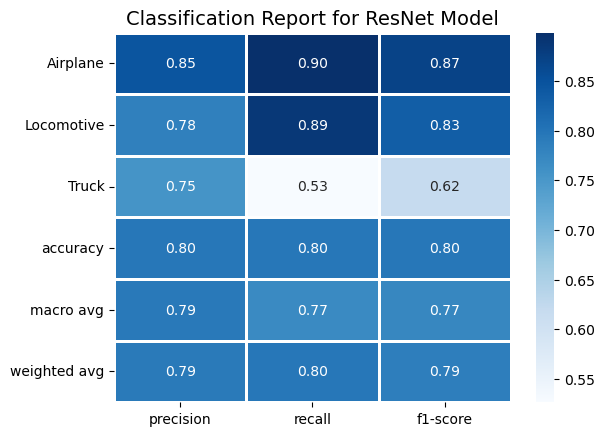

In [647]:
# Classification Report
test_labels = valid_gen.classes
names = ['Airplane', 'Locomotive', 'Truck']
clf_test = classification_report(test_labels, ypRN, target_names = names, output_dict = True)

# Heatmap view
sns.heatmap(pd.DataFrame(clf_test).iloc[:-1, :].T, annot = True, cmap = "Blues", linewidth = 1, fmt = '.2f')
plt.title("Classification Report for ResNet Model", fontsize = 14)
plt.show()

**Summary of Classification Report for ResNet Model:**

Here we see the ResNet Model performed better on the Airplane and Locomotive images, while struggling a bit on the Truck images.  Next, let's view the Confusion Matrix below.

**Figure 31: Confusion Matrix for ResNet Model**

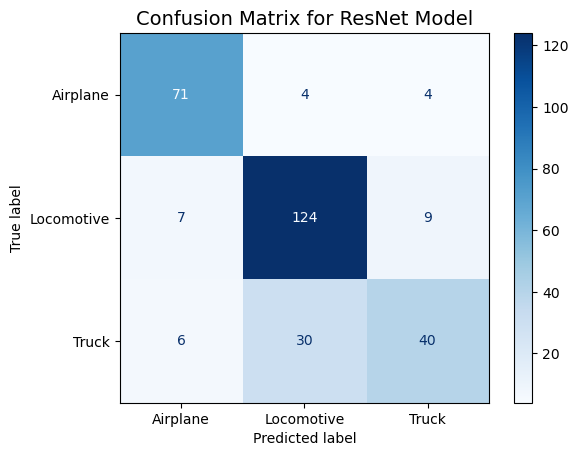

In [648]:
# Get labels 
test_labels = valid_gen.classes
labels = ['Airplane', 'Locomotive', 'Truck']

# Display confusion matrix
cm_RN = confusion_matrix(test_labels, ypRN)
cmd = ConfusionMatrixDisplay(cm_RN, display_labels=labels)
cmd.plot(cmap = plt.cm.Blues) 
plt.title('Confusion Matrix for ResNet Model', fontsize = 14)
plt.grid(False)
plt.show()

**Summary of Confusion Matrix for ResNet Model:**

Here we see the largest difficulty was with the Truck images being predicted as Locomotive images.

In [649]:
# Get F1-Score for ResNet
f1_rn = f1_score(test_labels, ypRN, average = 'weighted')
print("F1-Score for ResNet:", round(f1_rn,4))

#Get Accuracy score for ResNet
acc_rn = accuracy_score(test_labels, ypRN)
print("Accuracy Score for ResNet:", round(acc_rn,4))

F1-Score for ResNet: 0.788
Accuracy Score for ResNet: 0.7966


**Summary:**  Clearly, the ResNet model did not perform as well on this data compared to the CNN models above.  Most likely, this lower performance is due to our small dataset.

Finally, let's see how a Support Vector Machine model performs on this classification task.

## SVC Model

Lastly, we utilize a Support Vector Machine model or specifically Support Vector Classification (SVC) to see how it performs on the image data since it typically performs well at classification tasks.  To start, we must transform the images into numerical data for analysis.  

### Transform Images

In [652]:
# Transform images
classes = ['airplane', 'locomotive', 'truck']
input_arr = []
output_arr = []

# path for images
for i in classes:
    print(f"loading...class: {i}")
    path = os.path.join(train_pth, i)
    for img in os.listdir(path):
        img_arr = ski.io.imread(os.path.join(path, img))
        # convert to grayscale
        #img_arr_g = cv2.cvtColor(img_arr, cv2.COLOR_RGB2GRAY)
        #img_resize = ski.transform.resize(img_arr_g, (150,150,1)) # resize
        #input_arr.append(img_resize.flatten())
        input_arr.append(img_arr.flatten())
        output_arr.append(classes.index(i))
    print(f'loaded class: {i}')
print("Done")

flat_data = np.array(input_arr)
label = np.array(output_arr)
# create dataframe
df = pd.DataFrame(flat_data)
df['label'] = label
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

loading...class: airplane
loaded class: airplane
loading...class: locomotive
loaded class: locomotive
loading...class: truck
loaded class: truck
Done


In [653]:
# check 
x.head()

0       1       2       3       4       5       6       7       8       \
0     178     179     174     177     178     173     176     177     172   
1     255     255     255     255     255     255     255     255     255   
2     254     254     254     240     240     240     252     252     252   
3      39      42      33      53      56      47      66      69      62   
4     255     255     255     255     255     255     255     255     255   

   9       ...  196598  196599  196600  196601  196602  196603  196604  \
0     175  ...     243     252     253     247     252     254     251   
1     255  ...     255     255     255     255     255     255     255   
2     236  ...       7      40      46      12      45      51      17   
3      62  ...      65      62      66      65      59      63      62   
4     255  ...      78     141     118      87     141     127     101   

   196605  196606  196607  
0     252     254     251  
1     255     255     255  
2      30      36       0  
3      62      66      65  
4     255     249     227  

[5 rows x 196608 columns]

**Note: Given the size of the data, we split the training data into train and test sets to expedite the execution time and verify the results below.**

In [654]:
# using split, given size of data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42, stratify = y)

In [655]:
# Check shape
print("X train shape:", x_train.shape)
print("y train shape:", y_train.shape)

print("X test shape:", x_test.shape)
print("y test shape:", y_test.shape)

X train shape: (1304, 196608)
y train shape: (1304,)
X test shape: (326, 196608)
y test shape: (326,)


### Randomized Search CV

To expedite our investigation of the best performing hyperparameters, we utilized Randomized Search Cross Validation with a set of possible C, gamma and kernel selections for the SVC model.

In [451]:
from time import time

In [456]:
#initialize SVC model
svc = SVC()

In [453]:
# create grid of params
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.0001, 0.001, 0.1, 1],
              'kernel': ['rbf', 'poly']}

In [457]:
# Randomized Search CV
rand_cv_svc = RandomizedSearchCV(estimator = svc, param_distributions = param_grid,
    n_iter = 250, error_score = 'raise', refit = True, n_jobs = 2, random_state = 42, cv = 5, verbose = 1)

In [458]:
t0 = time()
rand_cv_svc.fit(x_train, y_train)
print(f"Done in {time() - t0:.3f}s")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Done in 5511.539s


In [527]:
# View top results
pd.set_option('display.max_colwidth', 150)
best_svc_params = pd.DataFrame(rand_cv_svc.cv_results_)
best_svc_params[['params', 'mean_test_score']].sort_values(by = 'mean_test_score', ascending = False).head(5)

params  mean_test_score
23       {'kernel': 'poly', 'gamma': 1, 'C': 10}         0.795264
3   {'kernel': 'poly', 'gamma': 0.001, 'C': 0.1}         0.795264
21     {'kernel': 'poly', 'gamma': 0.1, 'C': 10}         0.795264
5     {'kernel': 'poly', 'gamma': 0.1, 'C': 0.1}         0.795264
7       {'kernel': 'poly', 'gamma': 1, 'C': 0.1}         0.795264

**Summary:  Similar results for multiple selections. A clear preference was 'poly' kernel.**

This took over 5000 seconds to run.  One option to expedite was to first convert all images to grayscale and that code was added above.  However, we want to check these results below and the SVC model itself can run reasonably fast once the hyperparameters have been selected.

### SVC using Randomized Search CV recommendations

Here we use the best results from Randomized Search Cross Validation above.  While there were similar outcomes with different gamma or C values, the polynomial kernel performed best.

In [656]:
# Initiate model with poly kernel, gamma and C
svc_best = SVC(kernel = 'poly', gamma = 1, C = 10)

In [657]:
# Fit model 
svc_best.fit(x_train, y_train)

SVC(C=10, gamma=1, kernel='poly')

In [658]:
# Get predictions
yp_svc = svc_best.predict(x_test)

### Evaluation Metrics

Let's view the Classification Report and Confusion Matrix for this SVC model.

**Figure 32:  Classification Report for SVC**

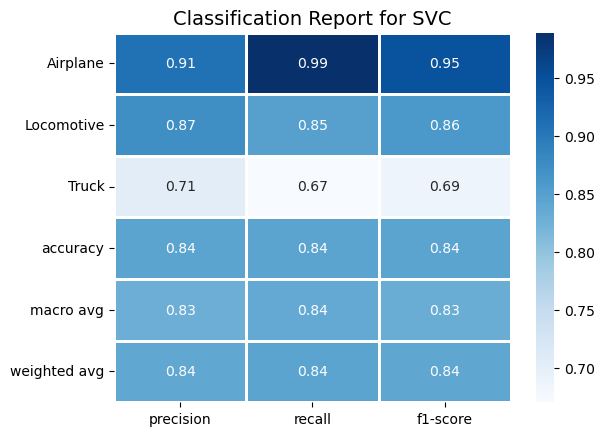

In [659]:
# Classification Report
names = ['Airplane', 'Locomotive', 'Truck']
clf_test = classification_report(y_test, yp_svc, target_names = names, output_dict = True)
# Heatmap view
sns.heatmap(pd.DataFrame(clf_test).iloc[:-1, :].T, annot = True, cmap = "Blues", linewidth = 1, fmt = '.2f')
plt.title("Classification Report for SVC", fontsize = 14)
plt.show()

**Summary of Classification Report for SVC:**

* The SVC model was most successful at identifying the Airplane images
* Next, the SVC model performed fairly well at identifying the Locomotive images
* The SVC model did not perform very well at identifying Truck images

Let's view the Confusion Matrix to see these numbers by True and Predicted labels.

**Figure 33: Confusion Matrix for SVC**

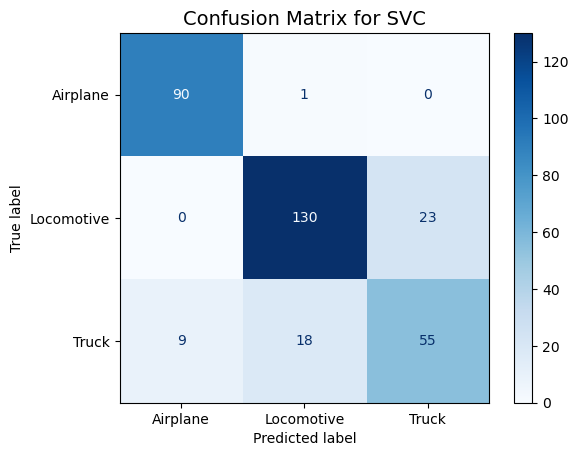

In [660]:
# Get labels 
labels = ['Airplane', 'Locomotive', 'Truck']
# Display confusion matrix
cm_svc = confusion_matrix(y_test, yp_svc)
cmd = ConfusionMatrixDisplay(cm_svc, display_labels=labels)
cmd.plot(cmap = plt.cm.Blues) 
plt.title('Confusion Matrix for SVC', fontsize = 14)
plt.grid(False)
plt.show()

**Summary of Confusion Matrix for SVC:**

* The SVC model performed well at identifying Airplane images with only 1 incorrectly identified as a Locomotive.
* While the SVC model generally performed well at identifying Locomotive images, the biggest confusion was between Locomotive and Truck images
* The biggest challenge for the SVC model was predicting the Truck images.
* If this dataset only contained Airplane and Locomotive images, the SVC model would have performed quite well on that binary classification task.

In [661]:
# Get F1-Score for SVC
f1_svc = f1_score(y_test, yp_svc, average = 'weighted')
print("F1-Score for SVC:", round(f1_svc,4))

#Get Accuracy score for SVC
acc_svc = accuracy_score(y_test, yp_svc)
print("Accuracy Score for SVC:", round(acc_svc,4))

F1-Score for SVC: 0.8414
Accuracy Score for SVC: 0.8436


# Test Directory and Images for Best Model

Now, we switch to our Test Directory, create predictions on the unseen test data and evaluate the results.  For expediency, only the best performing model from above, Model 21, is displayed.

In [ ]:
# Create test directory
#test_dir = os.path.join(proj_dir, 'test_dir')
#os.mkdir(test_dir)

# Create separate folders inside test for different labels
#airplane = os.path.join(test_dir, 'airplane')
#os.mkdir(airplane)

#locomotive = os.path.join(test_dir, 'locomotive')
#os.mkdir(locomotive)

#truck = os.path.join(test_dir, 'truck')
#os.mkdir(truck)

In [762]:
# Check folders exist
print("Test_dir folders:", os.listdir('proj_dir/test_dir'))

Test_dir folders: ['locomotive', 'truck', 'airplane']


**Transfer images into test directory**

In [758]:
# transfer images from each separate folder into test
#for image in plane_test_files:
    #fname = image
    #source_pth = os.path.join('airplane_images/data/test/airplanes', fname)
    #dest_pth = os.path.join('proj_dir/test_dir/airplane', fname)
    #shutil.copyfile(source_pth, dest_pth)

In [759]:
# transfer images from each separate folder into test
#for image in locomotive_test_files:
    #fname = image
    #source_pth = os.path.join('locomotive_images/data/test/steam_locomotive', fname)
    #dest_pth = os.path.join('proj_dir/test_dir/locomotive', fname)
    #shutil.copyfile(source_pth, dest_pth)

In [760]:
# transfer images from each separate folder into test
#for image in truck_test_files:
    #fname = image
    #source_pth = os.path.join('truck_images/data/test/truck', fname)
    #dest_pth = os.path.join('proj_dir/test_dir/truck', fname)
    #shutil.copyfile(source_pth, dest_pth)

In [761]:
# Check number of images in each folder
print("Test folder, airplane:", len(os.listdir('proj_dir/test_dir/airplane')))
print("Test folder, locomotive:", len(os.listdir('proj_dir/test_dir/locomotive')))
print("Test folder, truck:", len(os.listdir('proj_dir/test_dir/truck')))

Test folder, airplane: 233
Test folder, locomotive: 393
Test folder, truck: 215


**Change path for test data to generate predictions**

In [765]:
test_pth = 'proj_dir/test_dir'

In [766]:
test_gen = idg.flow_from_directory(test_pth,
                                  target_size = (img_sz, img_sz),
                                  batch_size = 1,
                                  class_mode = 'categorical', 
                                  shuffle = False)

Found 841 images belonging to 3 classes.


## Evaluation Metrics 

**Predictions for Model 21**

In [767]:
# Get predictions
yp_21_test = model21.predict(test_gen, steps = 841, verbose = 1)

841/841 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step


In [768]:
# Convert
yp21_test = yp_21_test.argmax(axis = 1)

**Figure 34: Classification Report for Model 21**

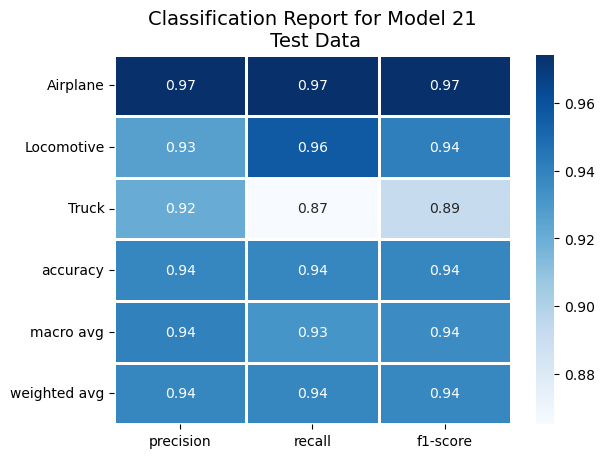

In [769]:
# Classification Report
test_labels = test_gen.classes
names = ['Airplane', 'Locomotive', 'Truck']
clf_test = classification_report(test_labels, yp21_test, target_names = names, output_dict = True)
# Heatmap view
sns.heatmap(pd.DataFrame(clf_test).iloc[:-1, :].T, annot = True, cmap = "Blues", linewidth = 1, fmt = '.2f')
plt.title("Classification Report for Model 21\n Test Data", fontsize = 14)
plt.show()

**Summary of Classification Report:**

We see similar results on the Test Data relative to the Validation Data above:

* This model predicted well on all three classes.

* Although, it also performed better on Airplane and Locomotive images than Truck images.  

Let's view the Confusion Matrix below.

**Figure 35: Confusion Matrix for Model 21**

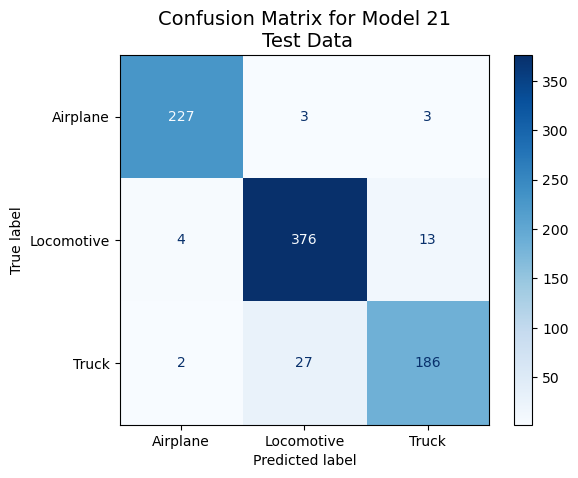

In [770]:
# Get labels and store confusion 
test_labels = test_gen.classes
labels = ['Airplane', 'Locomotive', 'Truck']
# Display confusion matrix
cm = confusion_matrix(test_labels, yp21_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(cmap = plt.cm.Blues) 
plt.title('Confusion Matrix for Model 21\n Test Data', fontsize = 14)
plt.grid(False)
plt.show()

**Summary of Confusion Matrix:**

The best performing model above, Model 21, performed well on the Test Data.  The performance was consistent across the classes between the Validation Data and Test Data.  The model performed best on the Airplane class, followed by Locomotive and then Truck images.

Now, let's view a comparison of the results across models.

# Compare Results Across Models

Let's summarize the results from above. The scores shown reflect the models' performance on the validation data.

## F1-Scores across Models

**Figure 36: F1-Scores across Models**

In [708]:
# Extract the f1_scores
f1_modscores = [f1_mod4, f1_mod5, f1_mod9, f1_mod16, f1_mod20, f1_mod21, f1_rn, f1_svc]
model_names = ["Model 4", "Model 5", "Model 9", "Model 16", "Model 20", "Model 21", "ResNet", "SVC"]

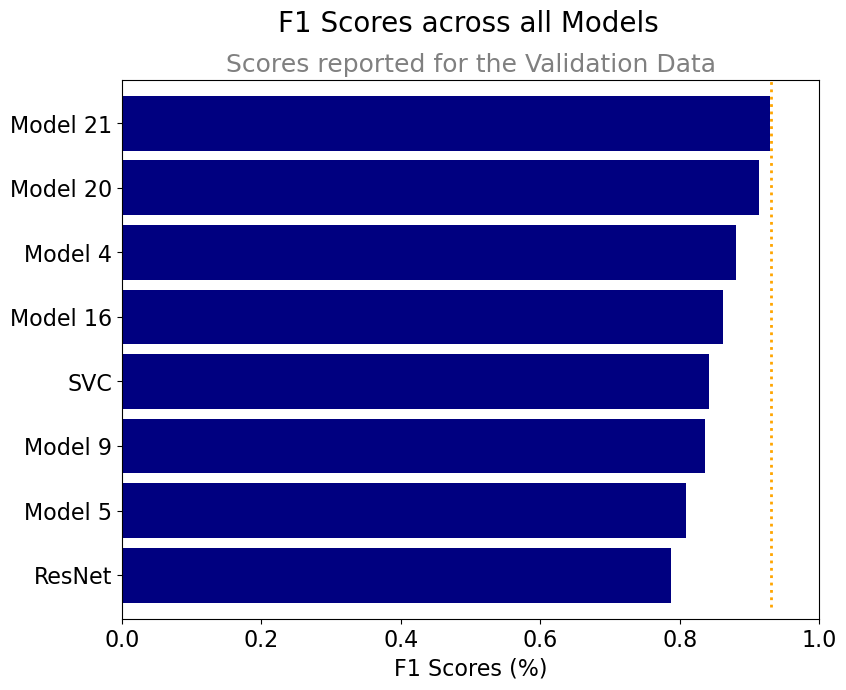

In [709]:
# Create plot of F1 and model names
plt.figure(figsize = (9,7))
plt.suptitle("F1 Scores across all Models", fontsize = 20, x = 0.51, y = 0.98)
plt.title("Scores reported for the Validation Data", fontsize = 18, color = "grey")
f1_plot = pd.Series(f1_modscores, index = model_names).sort_values(ascending = True)
ax = f1_plot.plot.barh(width = 0.85, color = 'navy')
plt.vlines(x = 0.93, ymin = -0.5, ymax = 100, color = "orange", ls = 'dotted', lw = 2)
plt.xticks(np.arange(0, 1.20, step= 0.2), fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("F1 Scores (%)", fontsize = 16)
plt.show()

**Summary of F1-Scores across Models:**

* Model 21 and 20 yielded the top F1-Scores of all models.

* SVC is in the middle of the graph and performed fairly well -- outperforming some of our CNN models, as well as the pre-trained ResNet model.

* The pre-trained ResNet model performed the worst of these models.

Next, let's view the Accuracy scores across the models.

## Accuracy Scores across Models

**Figure 37: Accuracy Scores across Models**

In [706]:
# Extract the accuracy scores for each model and create list of scores and models
acc_scores = [acc_mod4, acc_mod5, acc_mod9, acc_mod16, acc_mod20, acc_mod21, acc_rn, acc_svc]
model_names = ["Model 4", "Model 5", "Model 9", "Model 16", "Model 20", "Model 21", "ResNet", "SVC"]

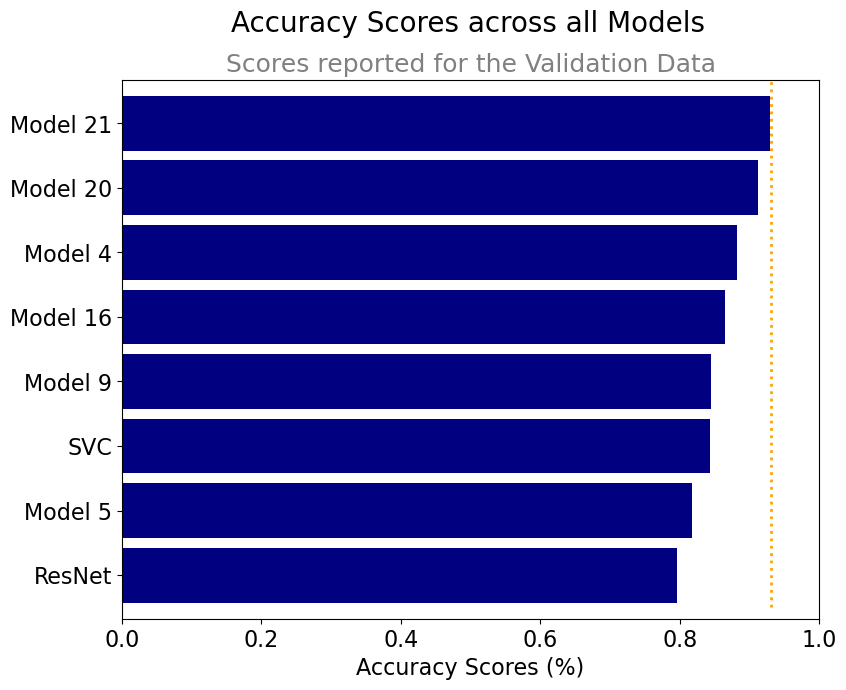

In [707]:
# Create plot of Accuracy and model names
plt.figure(figsize = (9,7))
plt.suptitle("Accuracy Scores across all Models", fontsize = 20, x = 0.51, y = 0.98)
plt.title("Scores reported for the Validation Data", fontsize = 18, color = "grey")
acc_plot = pd.Series(acc_scores, index = model_names).sort_values(ascending = True)
ax = acc_plot.plot.barh(width = 0.85, color = 'navy')
plt.vlines(x = 0.93, ymin = -0.5, ymax = 100, color = "orange", ls = 'dotted', lw = 2)
plt.xticks(np.arange(0, 1.20, step= 0.2), fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Accuracy Scores (%)", fontsize = 16)
plt.show()

**Summary of Accuracy Scores across Models:**

* Models 21 and 20 also scored the highest on the metric, Accuracy score.

* The SVC model did not perform quite as well as Model 9 on this metric and slipped a spot on the graph; however, we can see the scores were quite close between those two models.

* Again, the pre-trained ResNet model performed the poorest on this small dataset. 


## Validation Loss across Models

Next, let's view the loss for each model on the Validation Data.

**Figure 38: Validation Loss across Models**

In [710]:
# Extract the validation loss for each model and create list of scores and models
loss_scores = [min_val_loss4, min_val_loss5, min_val_loss9, min_val_loss16, min_val_loss20, min_val_loss21, min_val_lossRN]
model_names = ["Model 4", "Model 5", "Model 9", "Model 16", "Model 20", "Model 21", "ResNet Model"]

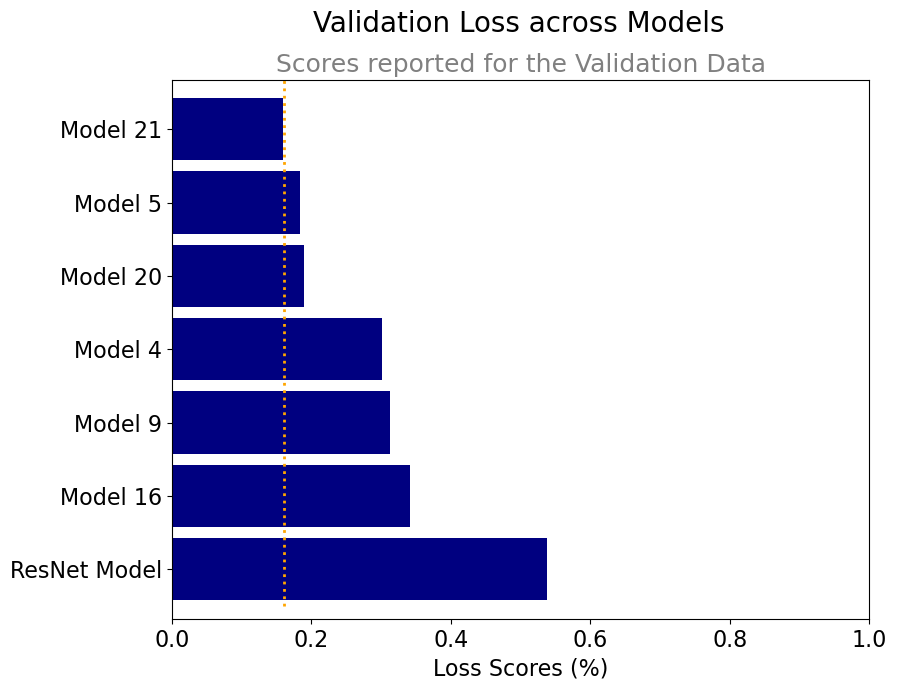

In [712]:
# Create plot of Loss and model names
plt.figure(figsize = (9,7))
plt.suptitle("Validation Loss across Models", fontsize = 20, x = 0.51, y = 0.98)
plt.title("Scores reported for the Validation Data", fontsize = 18, color = "grey")
acc_plot = pd.Series(loss_scores, index = model_names).sort_values(ascending = False)
ax = acc_plot.plot.barh(width = 0.85, color = 'navy')
plt.vlines(x = 0.16, ymin = -0.5, ymax = 100, color = "orange", ls = 'dotted', lw = 2)
plt.xticks(np.arange(0, 1.20, step= 0.2), fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Loss Scores (%)", fontsize = 16)
plt.show()

**Summary of Validation Loss across Models:**

* Model 21 also yielded the lowest Validation Loss of all models

* Model 5 generated a low Validation Loss; however, this model utilized Categorical Focal Crossentropy loss

* The ResNet model had the highest Validation Loss, which was consistent with the results from the two previous graphs

_Note: The SVC model is not listed_

## Summary Table of Results

Here is a summary of the top F1-Scores from models on the validation data. The results from the top model is shown in blue below.

**Table 3**

_Summary of Results for top Models on Validation Data_

| Model | F1-Score %| Conv. Layers| Kernel Initializer | Pooling | Dropout | Hidden Activation | Optimizer| Loss |            
|:---------------|:------------:|:------------:|:----------:|:----------:|:----------:|:----------:|:----------:|:-------:|
|**Model 4**| 88.0| 8 | He Normal | Average | Multiple | ELU | Adam | CCE |
|**Model 5**| 80.9 | 8 | Glorot Uniform | Average| Multiple | ReLU | Adam | CFCE |
|**Model 9**| 83.6| 10 | He Normal | Max| Multiple | ReLU | Adam | CCE |
|**Model 16**| 86.2| 5 | He Uniform | Average| Single | ReLU| Adam | CCE |
|**Model 20**| 91.4| 5 | He Uniform | Average| Single | ReLU | Adam | CCE |
|**Model 21**| $\color{blue}{ 92.9}$| 5 | He Uniform| Average| Single | ReLU | RMSprop | CCE |
|**ResNet**|$\color{red}{ 78.8}$| -| -|-| Single | ReLU | Adam | CCE |
|**SVC**|84.1| -| -| -| - | - | - | - |

**Highlights:**

* Similar F1-Scores were attained from different models utilizing various: initializers, dropout, hidden activation functions, as well as optimizers.

* The highest F1-Score noted in blue above was from "Model 21" which contained 5 Convolution layers of filters.

* The lowest F1-Score was from the ResNet model noted in red above.

* The SVC Model outperformed some of the CNN models

* Additional Convolution layers did not necessarily improve the models' performance.

* The execution time varied across these models and hyperparameters.


# Conclusion

**Based on our metrics and results, which model would we select?**

In summary, the top model we would select for analyzing and predicting with a high F1-Score on this data is CNN Model 21 which used the five Convolution layers and predicted well across all three classes.

However, a different metric could alter preferred modeling options. For example, if the goal was to find a particular class then one may choose a model with less balanced results across all categories. 

**Key Learnings and Takeaways**

* **Image Correlation:** During EDA, the Image Correlation Matrix showed lower correlation between the Airplane class and the other two classes. Our models performed best on the Airplane images. Therefore, this calculation identified where we may have issues.
  
* **Learning Rates:**  Modifying the Learning Rate for the optimizer while setting the Patience equal to 2 helped models persist through local minima and continue to improve across epochs.

* **Number of Layers:** Additional Convolutional layers did not necessarily generate better results, although, these layers did impact the execution time of the models

* **Hyperparameters:** Models generated similar results with ReLU or ELU Activation on the hidden layers and Adam or RMSprop optimizers. Therefore, it is worth exploring different hyperparameters.

* **SVC:** The SVC model performed better than a pre-trained ResNet model and would have done well on a binary classification problem with Airplane and Locomotive images, for example.  Thus, SVC would be a worthwhile consideration for certain image classification tasks.


## Other factors to consider

### Possible bias or factors that might impact results 

Differences in the data cleaning, pre-processing and preparation could impact the results.  Since this data contained more Locomotive images than Airplane or Truck images, the dataset was skewed to Locomotives.  However, the models typically performed best on the Airplane images.

Another factor that could impact results is the system used for building these models.  The iterations can be fairly time consuming and better hardware with more GPUs could process the sames models in reduced time -- or, allow the execution of more complex models.

### Areas for consideration

Some areas that would be interesting to explore further might include:

* Further modification of the Data Augmentation methods
 
* Using different customized Keras methods
  
* Evaluating how Pretrained Models from KerasHub performed on this data
  
* Employing other machine learning models

Overall, it was interesting to see how neural networks and SVC performed on this data.

**Thank you for reading!**

# Resources:

**Websites:**

* https://www.deeplearningbook.org/contents/convnets.html
  
* https://keras.io/api/layers/convolution_layers/convolution2d/

* https://keras.io/api/layers/normalization_layers/

* https://keras.io/api/layers/pooling_layers/

* https://keras.io/api/layers/regularization_layers/dropout/

* https://keras.io/api/callbacks/

* https://keras.io/api/optimizers/

* https://scikit-learn.org/stable/modules/svm.html


**GitHub Link:**  https://github.com/chiffr3/Deep_Learning 